<a href="https://colab.research.google.com/github/gbarcia/data_science_practice/blob/main/capstone_project_reference_notebook_loan_default_prediction_full_code_gerardobarcia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gerardo Barcia Palacios | MIT | June 2023


---



---


# **Loan Default Prediction**

## **Problem Definition**

### **The Context:**

 - Retail banks rely heavily on home loans for profit, but loan defaults can quickly eat into those earnings. Therefore, approving loans for customers requires careful consideration to minimize the risk of defaults. Unfortunately, the process of assessing creditworthiness is susceptible to human error and biases. While some banks have attempted to automate the approval process with heuristics, the new focus is on creating machines using data science and machine learning. However, it’s crucial to ensure that these machines don’t inherit biases from the previous human approval process. 

 - The bank’s credit department will develop the credit scoring model for home equity lines of credit in strict compliance with the guidelines outlined in the Equal Credit Opportunity Act. The model will be based on the data of recent applicants and must be crystal clear to support any rejections

### **The objective:**

 - To develop a classification model that accurately predicts clients who are likely to default on their loans. Additionally, the bank must receive recommendations on the pivotal factors to consider when granting or denying a loan.


### **The key questions:**

- How useful is the dataset provided, and what are the main weaknesses? (outliers, empty data, quality, etc). Which recomendatons can we offer to improve that in the future. 
- Which factors(variables in the dataset) are the most significant predictors of loan defaults?
- How can Exploration Data Analysis help determine patterns that could guide the bank before applying clasificación algorithms?
- How to strike a balance between minimizing risk and maximizing profitability when predicting customer behavior? In predicting loan defaults or customer creditworthiness, banks often prioritize reducing the risk of false negatives (classifying customers as non-defaulting when they default).
- What is the best classification model to predict the needs of the bank? Which scoring system should we use? Should we consider factors like F1 and Recall?

### **The problem formulation**:

- The bank wants to use data science to predict loan defaults for home equity loans and automate the loan approval process. They aim to address accuracy, efficiency, transparency, bias mitigation, and provide actionable recommendations for loan approvals.

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property. 

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts) 

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments). 

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due). 

* **CLAGE:** Age of the oldest credit line in months. 

* **NINQ:** Number of recent credit inquiries. 

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## **Import the necessary libraries and Data**

In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.impute import SimpleImputer

from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

from sklearn import tree

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

from sklearn.metrics import confusion_matrix, classification_report,recall_score,precision_score, accuracy_score

from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import IsolationForest

from sklearn.neighbors import LocalOutlierFactor

from scipy.stats import zscore

from sklearn.metrics import f1_score

from google.colab import drive

import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

## **Data Overview**

- Reading the dataset
- Understanding the shape of the dataset
- Checking the data types
- Checking for missing values
- Checking for duplicated values

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MIT Data Science/Data/Capstone Project/hmeq.csv')

In [ ]:
df.shape

(5960, 13)

In [ ]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.4,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.8,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.5,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.3,0.0,14.0,NaN


In [ ]:
df.tail()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.8,0.0,16.0,36.1
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.7,0.0,15.0,35.9
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.3,0.0,15.0,35.6
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.9,0.0,16.0,34.3
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.6,0.0,16.0,34.6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [ ]:
df.nunique()

BAD           2
LOAN        540
MORTDUE    5053
VALUE      5381
REASON        2
JOB           6
YOJ          99
DEROG        11
DELINQ       14
CLAGE      5314
NINQ         16
CLNO         62
DEBTINC    4693
dtype: int64

In [ ]:
df.isna().mean().round(4) * 100

BAD        0.0
LOAN       0.0
MORTDUE    8.7
VALUE      1.9
REASON     4.2
JOB        4.7
YOJ        8.6
DEROG     11.9
DELINQ     9.7
CLAGE      5.2
NINQ       8.6
CLNO       3.7
DEBTINC   21.3
dtype: float64

In [ ]:
numerical_columns = ['LOAN','MORTDUE', 'VALUE', 'YOJ', 'CLAGE', 'NINQ', 'CLNO','DEROG', 'DELINQ','DEBTINC']
categorical_columns = ['REASON', 'JOB']

In [ ]:
df.duplicated(subset=categorical_columns).any()

True

In [ ]:
df.duplicated(subset=numerical_columns).any()

False

In [ ]:
def print_duplicates(list_of_columns):
  for col in list_of_columns:
    sub_set_to_review = []
    sub_set_to_review.append(col)
    if (df.duplicated(sub_set_to_review).any() == True):
      print(col)

In [ ]:
print_duplicates(numerical_columns)

LOAN
MORTDUE
VALUE
YOJ
CLAGE
NINQ
CLNO
DEROG
DELINQ
DEBTINC


In [ ]:
print_duplicates(categorical_columns)

REASON
JOB


**Observations:**

- The dataset has 13 columns and 5960 rows.
- There are 11 columns that are numeric(2 integers and 9 floats) and 2 columns that are objects.
- There are 11 columns that have missing values. DEBTINC(~ 21%), DEROG(~ 12%), DELINQ(~ 10%), NINQ(~ 9%) are the ones that most.
- There are some duplicate data in the dataset. But given the nature of the dataset, these duplicates do not looks like a problem. (Categorical values, some Coincidences in loans,some statistical modes, etc)
- MORTDUE', 'VALUE', 'YOJ', 'CLAGE', 'NINQ', 'CLNO','DEROG', 'DELINQ' are numerical values.
- 'REASON', 'JOB' are categorical values.

## Summary Statistics

In [ ]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BAD,5960.0,0.2,0.4,0.0,0.0,0.0,0.0,1.0
LOAN,5960.0,18608.0,11207.5,1100.0,11100.0,16300.0,23300.0,89900.0
MORTDUE,5442.0,73760.8,44457.6,2063.0,46276.0,65019.0,91488.0,399550.0
VALUE,5848.0,101776.0,57385.8,8000.0,66075.5,89235.5,119824.2,855909.0
YOJ,5445.0,8.9,7.6,0.0,3.0,7.0,13.0,41.0
DEROG,5252.0,0.3,0.8,0.0,0.0,0.0,0.0,10.0
DELINQ,5380.0,0.4,1.1,0.0,0.0,0.0,0.0,15.0
CLAGE,5652.0,179.8,85.8,0.0,115.1,173.5,231.6,1168.2
NINQ,5450.0,1.2,1.7,0.0,0.0,1.0,2.0,17.0
CLNO,5738.0,21.3,10.1,0.0,15.0,20.0,26.0,71.0


**- Observations from Summary Statistics:**

  - The average loan amount is 18,608, with a std of 11,207.5. The range of loan amounts varies significantly, from a minimum of 1,100 to a maximum of 89,900. The median loan amount is 16,300, which suggests that the distribution of loan amounts is slightly skewed towards the higher end.

  - The mean mortgage amount is 73,760.8 with a standard deviation of 44,457.6. The range of mortgage amounts(MORTDUE) is relatively large, ranging from 2,063 to 399,550. The median mortgage amount is 65,019. It’s worth noting that there’s a range of mortgage amounts among the applicants. Certain applicants have higher mortgages, which could suggest pricier properties, while others have lower mortgages. It’s important to consider this diversity in mortgage amounts when evaluating the risk related to loan approvals and establishing suitable lending standards.

  - Certain properties exhibit higher values, which could imply that they are more costly or valuable compared to others that have lower values. On average, the property value (VALUE) is 101,776, with a standard deviation of 57,385.8. The range of property values is quite broad, ranging from $8,000 to 855,909. The median property value is 89,235.5.

  - The mean years at the present job is 8.9 with a standard deviation of 7.6. The range of years at the present job is from 0 to 41. The median years at the present job is 7.

  - Some applicants have longer tenures, potentially indicating stability and experience in their current employment, while others have shorter durations. The mean years at the present job (YOJ) is 8.9 with a standard deviation of 7.6. The range of years at the present job is from 0 to 41. The median years at the present job is 7.

  - The mean number of derogatory reports (DEROG) is 0.3 with a standard deviation of 0.8. The range of derogatory reports is from 0 to 10. While the mean is relatively low at 0.3, indicating a relatively low average number of derogatory reports, there are still applicants who have a higher number of derogatory reports. 

  - The mean number of delinquent(DELINQ) credit lines is 0.4 with a standard deviation of 1.1. The range of delinquent credit lines is from 0 to 15.

  - The mean age of the oldest credit line(CLAGE) is 179.8 months (~ 15 years) with a standard deviation of 85.8 months. The range of credit line ages is from 0 to 1168.2 months (98 years?). The mean age of 15 years suggests that, on average, applicants have had their oldest credit lines for a significant duration. However, the wide range and potential outliers highlight the need for further analysis to understand the distribution and potential impact

  - The mean number of recent credit inquiries(NINQ) is 1.2 with a standard deviation of 1.7. The range of recent credit inquiries is from 0 to 17. While the mean is relatively low at 1.2, indicating a relatively low average number of recent credit inquiries, there are still applicants who have a higher number of recent credit inquiries. The frequency of recent credit inquiries can be an important factor to consider. Higher numbers of recent credit inquiries might indicate a higher level of credit activity or potential financial instability.

  - The mean number of existing credit lines(CLNO) is 21.3 with a standard deviation of 10.1. The range of existing credit lines is from 0 to 71. Having a higher number of existing credit lines might indicate a higher level of credit exposure or potential financial strain if the borrower has multiple active credit obligations.This probably requires further analysis.

  - The mean debt-to-income ratio is 33.8 with a standard deviation of 8.6. The range of debt-to-income ratios is from 0.5 to 203.3. Higher ratios suggest a higher level of debt burden and may indicate a higher risk of loan default if the borrower's income is not sufficient to cover their debt obligations. 



## **Exploratory Data Analysis (EDA) and Visualization**

### **Univariate Analysis**


**Univariate analysis for numerical variables:**



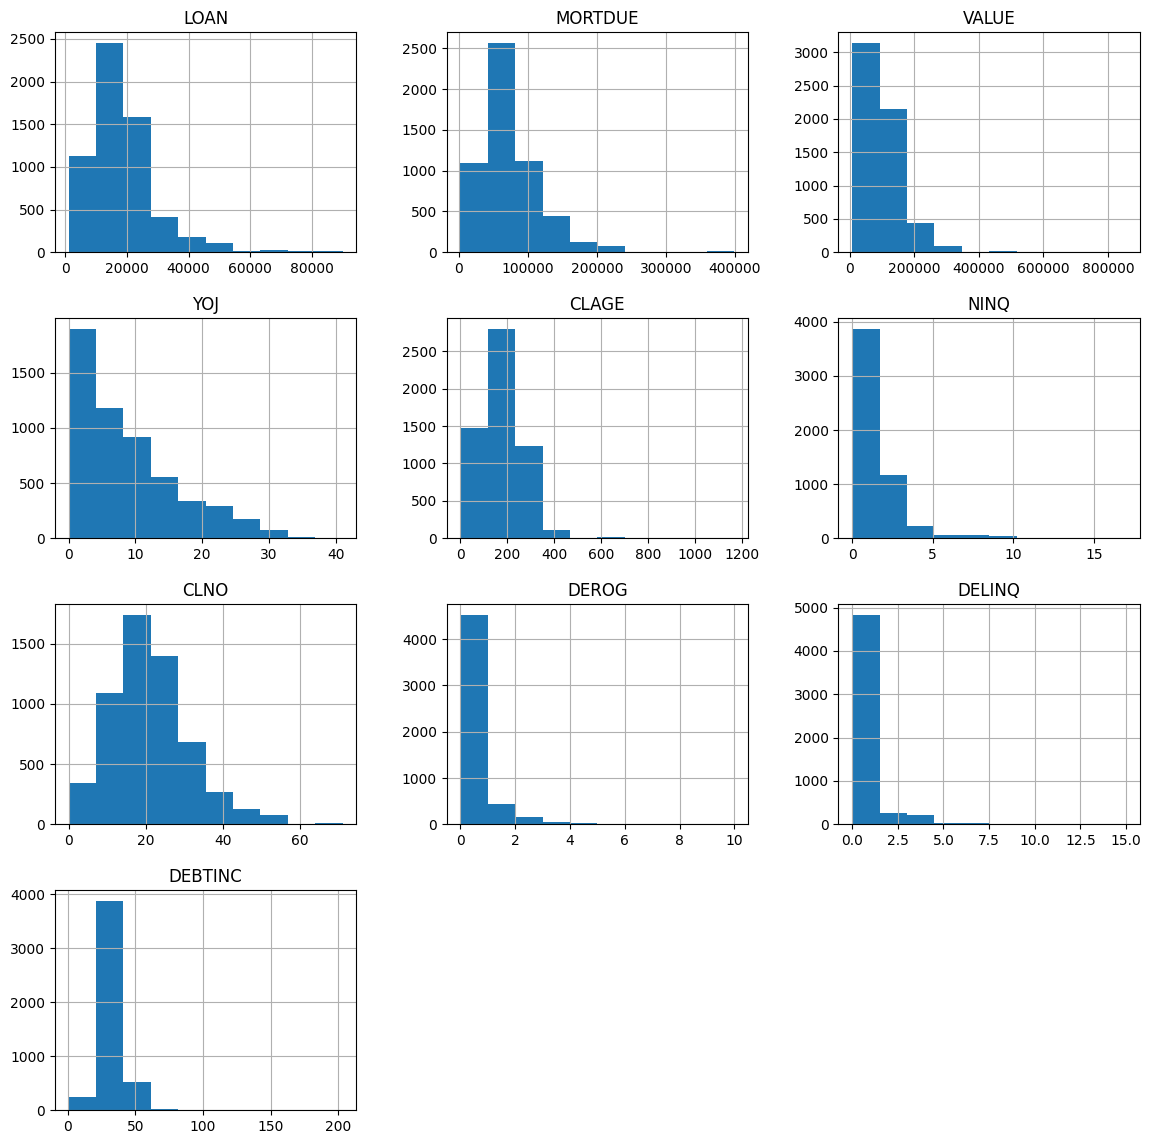

In [ ]:
df[numerical_columns].hist(figsize = (14, 14))
plt.show()

Observations:

As mentioned in the Summary Statistics, the majority of variables have a right-skewed distribution and contain significant outliers. Further information is provided below.

**Loan Repayment Status**

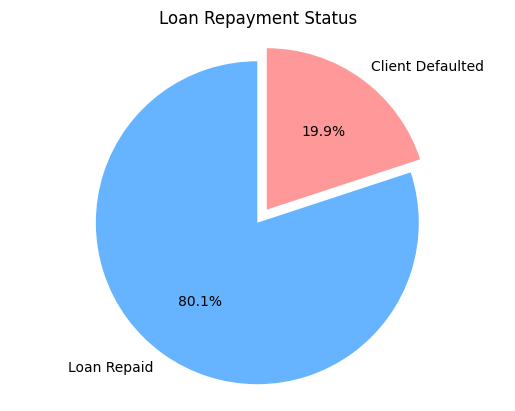

In [ ]:
# Count the number of occurrences for each value in the 'BAD' variable
bad_counts = df['BAD'].value_counts()

# Create a pie chart
labels = ['Loan Repaid', 'Client Defaulted']
sizes = bad_counts.values
colors = ['#66b3ff', '#ff9999']
explode = (0, 0.1)  # Explode the second slice (Client Defaulted)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Loan Repayment Status')
plt.axis('equal')
plt.show()

Observations:

*   Around 19% of the customers in the data set are in Defaulted situation
*   Around 81% of th customers in this dataset are in Repaid situation



**Univariate analysis for categorical variables:**

In [ ]:
for col in categorical_columns:
    print(df[col].value_counts(normalize = True))
    
    print('-' * 50)

DebtCon   0.7
HomeImp   0.3
Name: REASON, dtype: float64
--------------------------------------------------
Other     0.4
ProfExe   0.2
Office    0.2
Mgr       0.1
Self      0.0
Sales     0.0
Name: JOB, dtype: float64
--------------------------------------------------


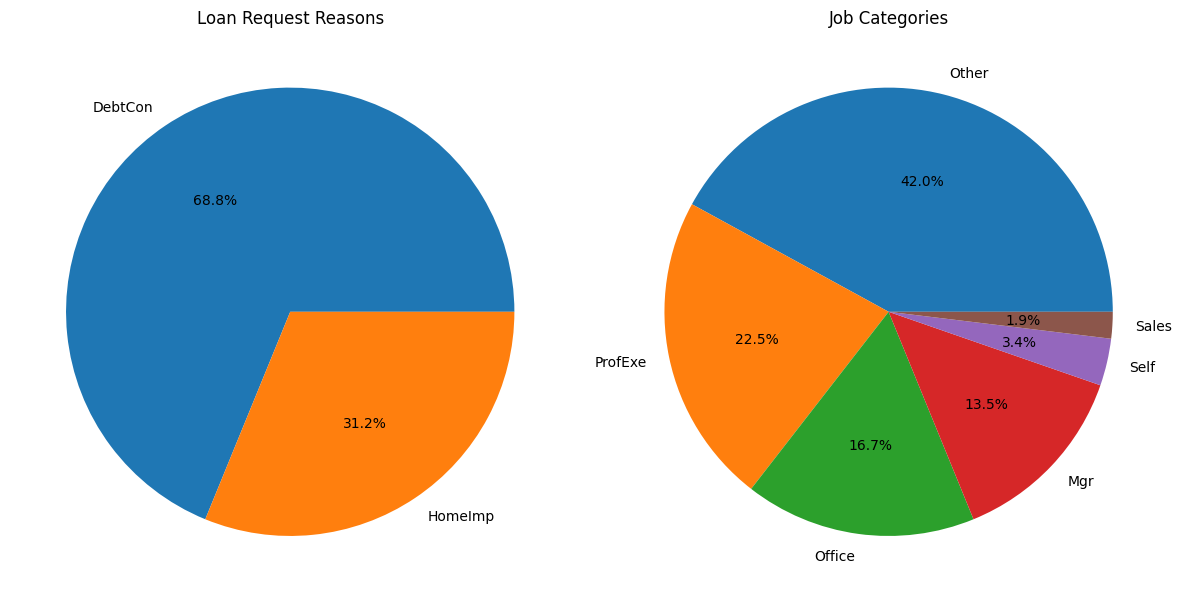

In [ ]:
reason_counts = df['REASON'].value_counts(normalize=True)
job_counts = df['JOB'].value_counts(normalize=True)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].pie(reason_counts, labels=reason_counts.index, autopct='%1.1f%%')
axes[0].set_title('Loan Request Reasons')

axes[1].pie(job_counts, labels=job_counts.index, autopct='%1.1f%%')
axes[1].set_title('Job Categories')

plt.tight_layout()
plt.show()

Observations:

- Approximately 70% of the applicants have listed "DebtCon" (debt consolidation) as the reason for the loan request.

- Around 30% of the applicants have listed "HomeImp" (home improvement) as the reason for the loan request.

- The most common job category among the applicants is "Other", which accounts for around 40% of the applicants. It will be interesting to try to catch the other categories as a future recommendations for the dataset engineering

- The next most common categories are "ProfExe" and "Office", each accounting for approximately 20% of the applicants.

- The categories "Mgr", "Self", and "Sales" have a relatively lower representation among the applicants, with each accounting for less than 10% of the total.

### **Bivariate Analysis**

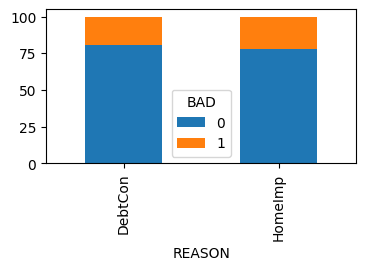

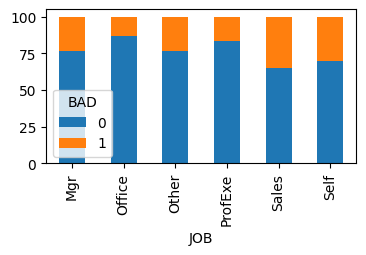

In [ ]:
for col in categorical_columns:
    if col != 'BAD':
        (pd.crosstab(df[col], df['BAD'], normalize = 'index')*100).plot(kind = 'bar', figsize = (4, 2), stacked = True)

In [ ]:
for col in categorical_columns:
    if col != 'BAD':
        print(pd.crosstab(df[col], df['BAD'], normalize = 'index')*100)

BAD        0    1
REASON           
DebtCon 81.0 19.0
HomeImp 77.8 22.2
BAD        0    1
JOB              
Mgr     76.7 23.3
Office  86.8 13.2
Other   76.8 23.2
ProfExe 83.4 16.6
Sales   65.1 34.9
Self    69.9 30.1


**Observations:**

- There is a significant percentage of loans categorized under Debt Consolidation have a favorable outcome, with a loan repaid at 81%. Similarly, loans categorized under Home Improvement also have a high percentage of favorable outcome at ~ 78%, albeit slightly lower. The percentage of loans marked with defaulted is relatively lower in both scenarios, with 19% for Debt Consolidation and 22.2% for Home Improvement.

- When it comes to job categories, loans from individuals in the "Office" category have the lowest percentage of defaults at ~13%. The Professional/Executive category follows with the second-lowest percentage of defaults at 16.6%. However, "Sales" category loans have the highest percentage defaulted at 35%, while "Self" loans follow with 30.1%. The Manager and "Other" categories are similar, hovering around 23%.


In [ ]:
df.groupby(['BAD'])[numerical_columns].mean()

,LOAN,MORTDUE,VALUE,YOJ,CLAGE,NINQ,CLNO,DEROG,DELINQ,DEBTINC
BAD,,,,,,,,,,
0,19028.1,74829.2,102595.9,9.2,187.0,1.0,21.3,0.1,0.2,33.3
1,16922.1,69460.5,98172.8,8.0,150.2,1.8,21.2,0.7,1.2,39.4


**Observations:**

- The mean mortgage amount and property value for clients who defaulted on their loans are slightly lower compared to clients who repaid their loans. This suggests that **lower mortgage amounts and property values may be associated with a higher likelihood of loan defaults**.

- The mean years at the present job for clients who defaulted on their loans is slightly lower compared to clients who repaid their loans. This indicates that **clients with fewer years of job stability may be at a higher risk** of defaulting on their loans.

- The mean age of the oldest credit line for clients who defaulted on their loans is lower than for clients who repaid their loans. This suggests that **clients with shorter credit history may be more prone to loan defaults**.

- The mean number of recent credit inquiries is slightly higher for clients who defaulted on their loans. This indicates that **a higher number of recent credit inquiries may be associated with an increased risk** of loan default.

- The mean number of existing credit lines is relatively similar for both groups. However, further analysis is required. Maybe later. 

- Clients who defaulted on their loans tend to have slightly higher mean values for both the number of major derogatory reports and the number of delinquent credit lines. **This suggests that clients with a history of derogatory reports and delinquencies may be at a higher risk** of loan default. That makes total sense. 

### **Multivariate Analysis**

<Axes: >

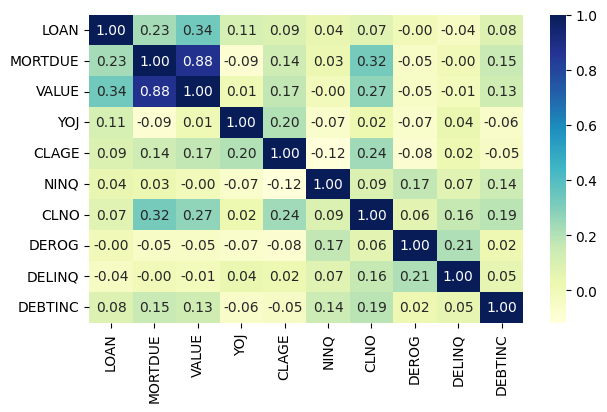

In [ ]:
plt.figure(figsize = (7, 4))

sns.heatmap(df[numerical_columns].corr(), annot = True, fmt = '0.2f', cmap = 'YlGnBu')

**Observations:**

- There is a strong positive correlation of 0.9 between the mortgage amount and the property value . This indicates that as **the mortgage amount increases, the property value tends to increase as well**.

- There is a positive correlation of 0.2 between the years at the present job and the age of the oldest credit line. This suggests that **individuals with longer job tenures tend to have longer credit histories**.

- There is a positive correlation of 0.1 between the number of recent credit inquiries and the number of existing credit lines. This indicates that individuals with a **higher number of recent credit inquiries could also tend to have more existing credit lines**.

- DEROG and DELINQ: There is a positive correlation of 0.2 between the number of major derogatory reports and the number of delinquent credit lines. This suggests that **individuals with a higher number of derogatory reports are also more likely to have delinquent** credit lines.



---



**Important Note:**

I decided to start treating the missing values before outliers for the following reasons:

* Missing values can lead to biased parameter estimates, reduced sample size, and distorted relationships between variables. Addressing missing values first can ensure the analysis is based on a more complete and representative dataset.

* Addressing missing values first helps to preserve the overall structure and patterns in the data. Outliers, on the other hand, are extreme values that can disrupt the distribution and relationships between variables. Handling missing values first can ensure that the imputed data retains the original structure, making it easier to identify and handle outliers accurately.

* Treating outliers before missing values assumes that the outliers are not influenced by the missing values. However, in many cases, missing values themselves can contribute to the occurrence of outliers. By addressing missing values first, we can mitigate the potential bias and distortion caused by outliers.

**Bibliography on which I base this argument:**

* Little, R. J., & Rubin, D. B. (2002). Statistical Analysis with Missing Data (2nd ed.). Wiley.

* Schafer, J. L. (1997). Analysis of Incomplete Multivariate Data. CRC Press. 

* Graham, J. W. (2009). Missing Data Analysis: Making It Work in the Real World. Annual Review of Psychology, 60, 549-576.

---


## Treating Missing Values

In [ ]:
df.isna().mean().round(4) * 100

BAD        0.0
LOAN       0.0
MORTDUE    8.7
VALUE      1.9
REASON     4.2
JOB        4.7
YOJ        8.6
DEROG     11.9
DELINQ     9.7
CLAGE      5.2
NINQ       8.6
CLNO       3.7
DEBTINC   21.3
dtype: float64

**Obsevations:**

- The dataset contains missing values for several variables. The percentage of missing data varies across the variables, ranging from 0.0% for BAD and LOAN to 21.3% for DEBTINC.

- Variables like DEROG and DELINQ have relatively high percentages of missing values (11.9% and 9.7% respectively)

- DEBTINC needs to be treated differently. Maybe using the median.

**Strategy:** Check the accuracy of imput numerical values using the mean and trhough a linear regression:

In [ ]:
missing_columns = ['MORTDUE', 'VALUE','YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']

df_imputed = df.copy()

# One-hot encode categorical columns
categorical_columns = ['REASON', 'JOB']
for col in categorical_columns:
    df_encoded = pd.get_dummies(df[col], prefix=col, prefix_sep='_')
    df_imputed = pd.concat([df_imputed, df_encoded], axis=1)

df_imputed.drop(categorical_columns, axis=1, inplace=True)


for col in missing_columns:
    missing_mask = df_imputed[col].isnull()
    imputed_col = col + '_imputed'

    imputer = SimpleImputer(strategy='mean')
    df_imputed[imputed_col] = imputer.fit_transform(df_imputed[[col]])

    df_imputed.loc[missing_mask, col] = df_imputed.loc[missing_mask, imputed_col]

# Perform cross-validation to measure the imputation accuracy
model = LinearRegression() 
imputation_accuracy = cross_val_score(model, df_imputed.drop(missing_columns, axis=1), df_imputed[missing_columns], cv=5, scoring='r2')

print("Imputation Accuracy Scores:")
print(imputation_accuracy)
print("Mean Imputation Accuracy:", imputation_accuracy.mean())



Imputation Accuracy Scores:
[1. 1. 1. 1. 1.]
Mean Imputation Accuracy: 1.0


**Observations:** 

*   Using means seems to have a good level of accuracy 

*   It is strongly recommended to address the "DEBTINC" column separately due to its significantly higher rate of missing data.



In [ ]:
# Handle missing numerical values
numerical_imputer = SimpleImputer(strategy='mean')
df[numerical_columns] = numerical_imputer.fit_transform(df[numerical_columns])

# Handle missing categorical values
categorical_columns = ['REASON', 'JOB']
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

# Handle missing DEBTINC column separately due to higher missing percentage
debtinc_imputer = SimpleImputer(strategy='median')
df['DEBTINC'] = debtinc_imputer.fit_transform(df[['DEBTINC']])

print(df.isnull().sum())

df.head()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64


,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100.0,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.4,1.0,9.0,33.8
1,1,1300.0,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.8,0.0,14.0,33.8
2,1,1500.0,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.5,1.0,10.0,33.8
3,1,1500.0,73760.8,101776.0,DebtCon,Other,8.9,0.3,0.4,179.8,1.2,21.3,33.8
4,0,1700.0,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.3,0.0,14.0,33.8


## Treating Outliers

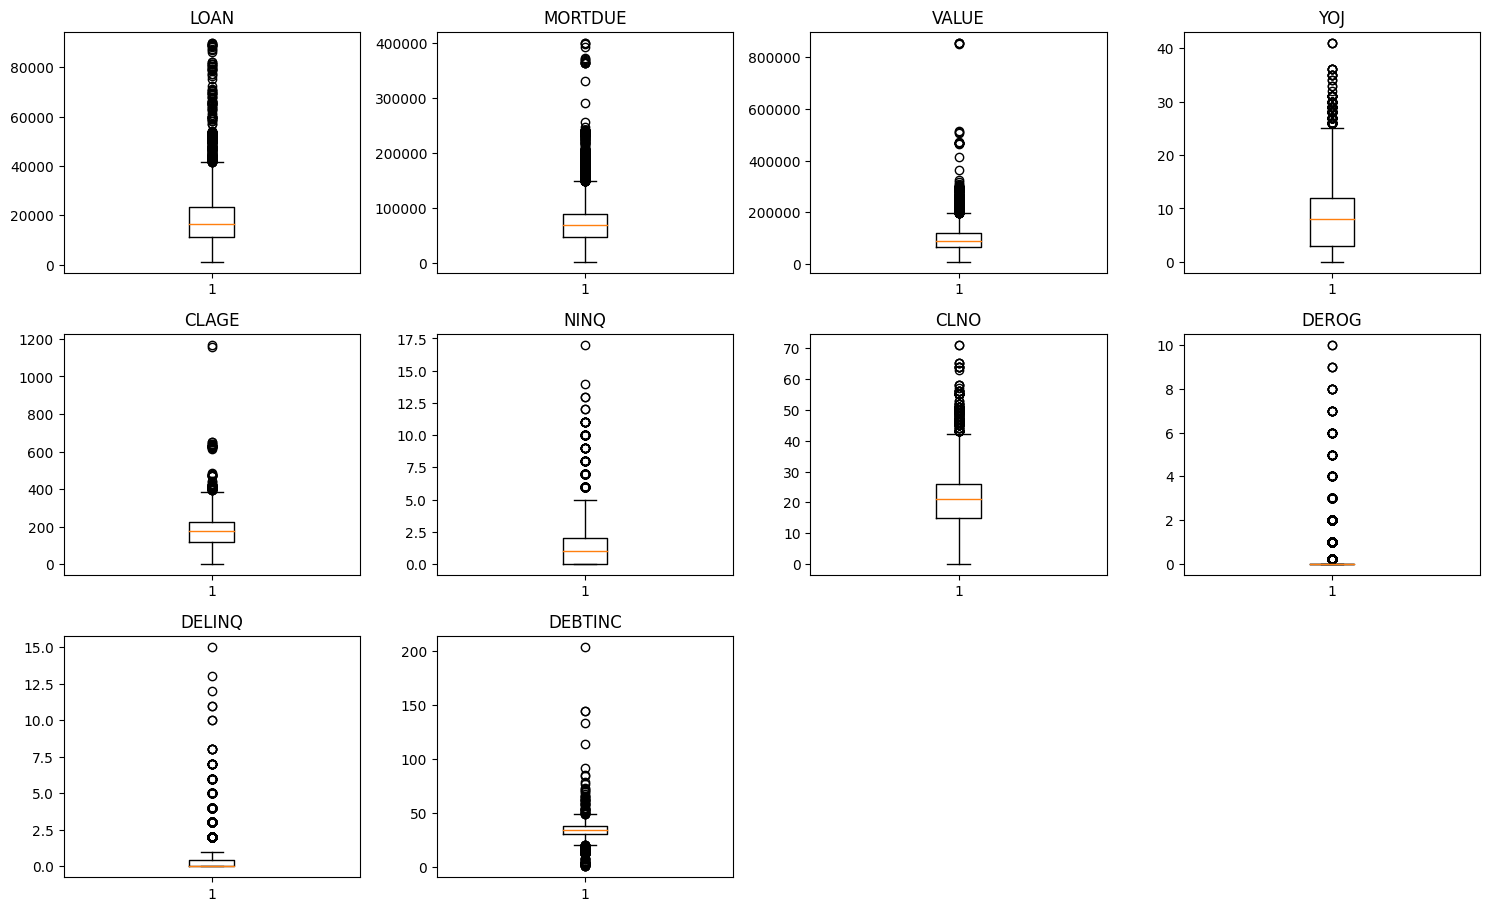

In [ ]:
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numerical_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Strategy:** The biggest challenge is eliminating as many outliers as possible without incurring data loss. 

Scenarios will be simulated in which the impact on the quality of the results and the percentage of loss of the following methods will be explored:

**Exploring with IQR:**

In [ ]:
num_rows_before = df.shape[0]

df_no_outliers = df.copy()
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]
num_rows_after = df_no_outliers.shape[0]

# Calculate the percentage of data lost
percentage_data_lost = (num_rows_before - num_rows_after) / num_rows_before * 100

for col in numerical_columns:
    num_rows_col_before = df[col].shape[0]
    num_rows_col_after = df_no_outliers[col].shape[0]
    percentage_data_lost_col = (num_rows_col_before - num_rows_col_after) / num_rows_col_before * 100
    print(f"Percentage data lost for {col}: {percentage_data_lost_col:.2f}%")

print(f"Overall percentage of data lost: {percentage_data_lost:.2f}%")

Percentage data lost for LOAN: 45.23%
Percentage data lost for MORTDUE: 45.23%
Percentage data lost for VALUE: 45.23%
Percentage data lost for YOJ: 45.23%
Percentage data lost for CLAGE: 45.23%
Percentage data lost for NINQ: 45.23%
Percentage data lost for CLNO: 45.23%
Percentage data lost for DEROG: 45.23%
Percentage data lost for DELINQ: 45.23%
Percentage data lost for DEBTINC: 45.23%
Overall percentage of data lost: 45.23%


Observations:

*   It seems that these IQR approach will represent loosing 45.23% of the original data. It is a high price to pay. Let's explore other options playing the multipliers in IQR:



In [ ]:
def calculate_data_loss(df, numerical_columns, lower_multiplier, upper_multiplier):
    loss_data = []

    num_rows_before = df.shape[0]

    for lower_mult in lower_multiplier:
        for upper_mult in upper_multiplier:
            df_no_outliers = df.copy()
            for col in numerical_columns:
                Q1 = df[col].quantile(0.25)
                Q3 = df[col].quantile(0.75)
                IQR = Q3 - Q1
                lower_bound = Q1 - lower_mult * IQR
                upper_bound = Q3 + upper_mult * IQR
                df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]

            num_rows_after = df_no_outliers.shape[0]
            percentage_data_lost = (num_rows_before - num_rows_after) / num_rows_before * 100

            loss_data.append((lower_mult, upper_mult, percentage_data_lost))

    loss_df = pd.DataFrame(loss_data, columns=['Lower Multiplier', 'Upper Multiplier', 'Percentage Data Lost'])
    return loss_df

# Define the range of multipliers to test
lower_multiplier_range = [1.0, 1.5, 2.0]
upper_multiplier_range = [1.0, 1.5, 2.0]

result_table = calculate_data_loss(df, numerical_columns, lower_multiplier_range, upper_multiplier_range)
print(result_table)


   Lower Multiplier  Upper Multiplier  Percentage Data Lost
0               1.0               1.0                  61.7
1               1.0               1.5                  49.1
2               1.0               2.0                  43.6
3               1.5               1.0                  58.7
4               1.5               1.5                  45.2
5               1.5               2.0                  39.0
6               2.0               1.0                  57.9
7               2.0               1.5                  44.1
8               2.0               2.0                  37.7


**Observations:**

When using multipliers, the minimum data loss can reach up to ~ 37%, which is quite significant. Therefore, it's worth investigating alternative methods to minimize such losses.

In [ ]:
df_copy = df.copy()

# Dictionary to store the outlier detection methods
methods = {
    'Local Outlier Factor': LocalOutlierFactor(),
    'Z-score': None,  # Placeholder for Z-score method
    'Isolation Forest': IsolationForest()
}

# Perform outlier detection for each method
for method, detector in methods.items():
    if method == 'Z-score':
        # Apply z-score normalization to the numerical columns
        df_copy[numerical_columns] = df_copy[numerical_columns].apply(zscore)
        # Identify outliers based on z-score threshold (e.g., 3 standard deviations)
        zscore_outliers = df_copy[(df_copy[numerical_columns] > 3).any(axis=1)].dropna()
        zscore_outliers_removed = df_copy.drop(zscore_outliers.index)
        zscore_effectiveness = (zscore_outliers.shape[0] / df_copy.shape[0]) * 100
        methods[method] = (zscore_outliers.shape[0], zscore_effectiveness)
    else:
        # Perform outlier detection using the specific method
        outliers = df_copy[numerical_columns][detector.fit_predict(df_copy[numerical_columns]) == -1]
        outliers_removed = df_copy.drop(outliers.index)
        effectiveness = (outliers.shape[0] / df_copy.shape[0]) * 100
        methods[method] = (outliers.shape[0], effectiveness)

results_df = pd.DataFrame.from_dict(methods, orient='index', columns=['Data Points Removed', 'Data Lost (%)'])
print(results_df)


                      Data Points Removed  Data Lost (%)
Local Outlier Factor                  145            2.4
Z-score                               693           11.6
Isolation Forest                      429            7.2


**Observations and Final Decision**

When using the Z-SCORE method, a significant amount of data, roughly 11%, is lost. However, Local Outlier Factor and Isolation Forest produce more reasonable results, with only 2% and 8% data loss, respectively.

To accommodate our various models' needs, I will create two different DataSets. For our logistic regressions, which are sensitive to outliers, I will use the Isolation Forest algorithm, accepting the loss of approximately 8% of the data. For decision trees and random forests, which are less sensitive to outliers, I will use the Local Outlier Factor algorithm, with an acceptable loss of just 2% of the data.

---

These are the references I used to make my decision:


* Aggarwal, C. C. (2015). Outlier Analysis. In Data Mining: The Textbook (2nd ed., pp. 183-223). Springer.

* Fox, J. (2016). Applied Regression Analysis and Generalized Linear Models (3rd ed.). Sage Publications.

* Hadi, A. S., & Simonoff, J. S. (2013). Procedures for the Identification of Multiple Outliers in Linear Regression Models. Journal of Statistical Computation and Simulation, 83(3), 431-450.

* Louzada-Neto, F., & Sardinha, A. (2008). Handling Outliers in Logistic Regression: A Comparison of Robust, Ignorable and Influential Approaches. Biometrical Journal, 50(2), 283-302.


---



**The new types of Datasets in the exercise:**

*   "df" remain the same name and will represent the dataset with the Outlier Factor method applied

*   "df_for_regresion" will be the other dataset and will represent the dataset withwith Isolation Forest method applied to remove the outliers.



**Building the "df_for_regresion" dataset applying Isolation Forest Method:**

Checking first the best contamination parameter:

In [ ]:
data = df.copy()

data_numeric = data.select_dtypes(include=np.number)

# Define a list of contamination values to try
contamination_values = [0.01, 0.02, 0.03, 0.04, 0.05,0.09]

best_contamination = None
best_outlier_count = 0

# Iterate over each contamination value
for contamination in contamination_values:
  
    clf = IsolationForest(contamination=contamination)

    clf.fit(data_numeric)

    # Predict the outliers using the Isolation Forest
    outliers = clf.predict(data_numeric)

    # Convert the outliers predictions to binary format (0 for inliers, 1 for outliers)
    outliers = np.where(outliers == -1, 1, 0)

    outlier_count = np.sum(outliers)

    # Check if the current number of outliers is higher than the previous best count
    if outlier_count > best_outlier_count:
        best_outlier_count = outlier_count
        best_contamination = contamination

print("Best Contamination Value:", best_contamination)
print("Number of Outliers:", best_outlier_count)


Best Contamination Value: 0.09
Number of Outliers: 537


Applying contamination value of 0.09 to build the "df_for_regresion" dataset:

In [ ]:
df_for_regresion = df.copy()

# Select the columns for outlier detection
columns_for_outlier_detection = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']

data_for_outlier_detection = df_for_regresion[columns_for_outlier_detection]

# Create an Isolation Forest instance
isolation_forest = IsolationForest(contamination=0.09)  # Adjust the contamination parameter as needed

isolation_forest.fit(data_for_outlier_detection)

outlier_predictions = isolation_forest.predict(data_for_outlier_detection)

# Filter out the outliers
df_for_regresion = df_for_regresion[outlier_predictions == 1]

print(df_for_regresion)


      BAD    LOAN  MORTDUE    VALUE   REASON     JOB  YOJ  DEROG  DELINQ  \
0       1  1100.0  25860.0  39025.0  HomeImp   Other 10.5    0.0     0.0   
1       1  1300.0  70053.0  68400.0  HomeImp   Other  7.0    0.0     2.0   
2       1  1500.0  13500.0  16700.0  HomeImp   Other  4.0    0.0     0.0   
3       1  1500.0  73760.8 101776.0  DebtCon   Other  8.9    0.3     0.4   
4       0  1700.0  97800.0 112000.0  HomeImp  Office  3.0    0.0     0.0   
...   ...     ...      ...      ...      ...     ...  ...    ...     ...   
5955    0 88900.0  57264.0  90185.0  DebtCon   Other 16.0    0.0     0.0   
5956    0 89000.0  54576.0  92937.0  DebtCon   Other 16.0    0.0     0.0   
5957    0 89200.0  54045.0  92924.0  DebtCon   Other 15.0    0.0     0.0   
5958    0 89800.0  50370.0  91861.0  DebtCon   Other 14.0    0.0     0.0   
5959    0 89900.0  48811.0  88934.0  DebtCon   Other 15.0    0.0     0.0   

      CLAGE  NINQ  CLNO  DEBTINC  
0      94.4   1.0   9.0     33.8  
1     121.8   0.0

In [ ]:
df_for_regresion.shape

(5423, 13)

In [ ]:
df_for_regresion.describe().T

,count,mean,std,min,25%,50%,75%,max
BAD,5423.0,0.2,0.4,0.0,0.0,0.0,0.0,1.0
LOAN,5423.0,17645.0,9799.3,1100.0,11000.0,15900.0,22400.0,89900.0
MORTDUE,5423.0,70547.6,34588.3,2063.0,48175.5,68729.0,85214.0,399550.0
VALUE,5423.0,97439.6,44764.3,8000.0,66518.0,89005.0,116837.5,316000.0
YOJ,5423.0,8.8,7.0,0.0,3.0,8.0,12.0,41.0
DEROG,5423.0,0.2,0.5,0.0,0.0,0.0,0.0,5.0
DELINQ,5423.0,0.3,0.7,0.0,0.0,0.0,0.4,7.0
CLAGE,5423.0,176.5,76.7,0.5,116.8,176.5,222.6,648.3
NINQ,5423.0,1.0,1.3,0.0,0.0,1.0,1.2,11.0
CLNO,5423.0,20.8,9.2,0.0,15.0,20.0,26.0,65.0


**Observations:**

It appears that the original dataset's essence has been preserved, with some extreme outliers removed while others remain. Overall, this seems like an acceptable tradeoff.



---



**Applying Outlier Factor method to "df" dataset for Random Forest and Trees Models:**

In [ ]:
lof = LocalOutlierFactor(contamination='auto')
outlier_scores = lof.fit_predict(df[numerical_columns])

# Get the indices of the worst outlier rows
worst_outlier_indices = outlier_scores == -1

# Print the worst outlier rows
worst_outliers = df[worst_outlier_indices]
print("Worst Outliers:")
print(worst_outliers)

# Remove the worst outlier rows from the cleaned dataset
df = df[~worst_outlier_indices]

# Print the cleaned dataset
print("New df dataset:")
print(df)


Worst Outliers:
      BAD    LOAN  MORTDUE    VALUE   REASON      JOB  YOJ  DEROG  DELINQ  \
3       1  1500.0  73760.8 101776.0  DebtCon    Other  8.9    0.3     0.4   
9       1  2000.0  73760.8  62250.0  HomeImp    Sales 16.0    0.0     0.0   
16      1  2200.0  90957.0 102600.0  HomeImp      Mgr  7.0    2.0     6.0   
21      1  2400.0  50000.0  73395.0  HomeImp  ProfExe  5.0    1.0     0.0   
40      1  3000.0  73760.8   8800.0  HomeImp    Other  2.0    0.0     1.0   
...   ...     ...      ...      ...      ...      ...  ...    ...     ...   
5903    0 62900.0 119903.0 201928.0  DebtCon  ProfExe  9.0    0.0     0.0   
5930    1 72300.0  73760.8  85000.0  DebtCon    Other  1.0    0.0     0.0   
5931    1 75400.0  73760.8  89609.0  DebtCon    Other  1.0    0.0     0.0   
5933    1 77200.0  83962.0 215000.0  HomeImp     Self  8.0    1.0     2.0   
5934    1 77400.0  87651.0 224630.0  HomeImp     Self  9.0    0.0     2.0   

      CLAGE  NINQ  CLNO  DEBTINC  
3     179.8   1.2  21.3 

In [ ]:
df.shape

(5815, 13)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BAD,5815.0,0.2,0.4,0.0,0.0,0.0,0.0,1.0
LOAN,5815.0,18423.1,10929.8,1100.0,11100.0,16200.0,23000.0,89900.0
MORTDUE,5815.0,72583.8,39472.4,2063.0,48031.5,69117.0,87264.0,256431.0
VALUE,5815.0,99786.9,49156.2,11550.0,66412.5,89720.0,118013.5,301984.0
YOJ,5815.0,9.0,7.2,0.0,3.0,8.0,12.0,41.0
DEROG,5815.0,0.2,0.8,0.0,0.0,0.0,0.0,10.0
DELINQ,5815.0,0.4,1.1,0.0,0.0,0.0,0.4,15.0
CLAGE,5815.0,179.6,83.3,0.0,117.5,178.5,226.4,1168.2
NINQ,5815.0,1.2,1.6,0.0,0.0,1.0,2.0,17.0
CLNO,5815.0,21.3,9.9,0.0,15.0,21.0,26.0,65.0


**Observations:**

Now, fot the "df" dataset, a conservative approach was taken by eliminating only a few extreme values. However, since trees and random forests are not highly affected by outliers, this approach appears sufficient.



---



**Do applicants who default have a significantly different mortgage amount compared to those who repay their loan?**

 Running an independent two-sample t-test to compare the mortgage amounts of applicants who defaulted on their loans (defaulted) with those who repaid their loans (repaid):

In [ ]:
defaulted = df[df['BAD'] == 1]
repaid = df[df['BAD'] == 0]  

mortgage_defaulted = defaulted['MORTDUE']
mortgage_repaid = repaid['MORTDUE']

t_stat, p_value = stats.ttest_ind(mortgage_defaulted, mortgage_repaid, equal_var=True)

if p_value < 0.05:
    print("There is a significant difference in mortgage amounts between defaulting and repaying applicants.")
else:
    print("There is no significant difference in mortgage amounts between defaulting and repaying applicants.")


There is a significant difference in mortgage amounts between defaulting and repaying applicants.


## **Important Insights from EDA**

**Leading Questions**:

1. What is the range of values for the loan amount variable "LOAN"?
2. How does the distribution of years at present job "YOJ" vary across the dataset?
3. How many unique categories are there in the REASON variable?
4. What is the most common category in the JOB variable?
5. Is there a relationship between the REASON variable and the proportion of applicants who defaulted on their loan?
6. Do applicants who default have a significantly different loan amount compared to those who repay their loan?
7. Is there a correlation between the value of the property and the loan default rate?
8. Do applicants who default have a significantly different mortgage amount compared to those who repay their loan?

**Principal Insights:**

* The loan amount variable "LOAN" ranges from a minimum of 1,100 to a maximum of 89,900, with a wide range of values in between. This indicates that the approved loan amounts vary significantly among the applicants in the dataset.

* The distribution of years at present job varies across the dataset. On average, applicants have a present job tenure of approximately 8.9 years. However, the distribution shows a considerable range, with some applicants having no years of experience while others have up to 41 years of experience. This indicates that there is diversity in terms of employment stability and tenure among the loan applicants.

* The REASON variable has two unique categories: "DebtCon" and "HomeImp." These categories represent the reasons provided by applicants for their loan requests. There is a significant percentage of loans categorized under Debt Consolidation have a favorable outcome, with a loan repaid at 81%. Similarly, loans categorized under Home Improvement also have a high percentage of favorable outcome at ~ 78%, albeit slightly lower. The percentage of loans marked with defaulted is relatively lower in both scenarios, with 19% for Debt Consolidation and 22.2% for Home Improvement.

* The most common job category among the applicants is "Other", which accounts for around 40% of the applicants. It will be interesting to try to catch the other categories as a future recommendations for the dataset engineering. The next most common categories are "ProfExe" and "Office", each accounting for approximately 20% of the applicants.The categories "Mgr", "Self", and "Sales" have a relatively lower representation among the applicants, with each accounting for less than 10% of the total. Loans from individuals in the "Office" category have the lowest percentage of defaults at ~13%. The Professional/Executive category follows with the second-lowest percentage of defaults at 16.6%. However, "Sales" category loans have the highest percentage defaulted at 35%, while "Self" loans follow with 30.1%. The Manager and "Other" categories are similar, hovering around 23%.

* There is a relationship between the REASON and the proportion of applicants who defaulted on their loan. Among applicants who took out loans for debt consolidation (DebtCon), approximately 19% defaulted, whereas among those who took loans for home improvement purposes (HomeImp), approximately 22.2% defaulted. This suggests that applicants who took loans for home improvement purposes had a slightly higher default rate compared to those who took loans for debt consolidation.

* Applicants who default on their loan have a slightly different loan amount compared to those who repay their loan. On average, applicants who defaulted had a loan amount of approximately 16900 while those who repaid their loan had an average loan amount of approximately 19000.

* We can observe that the value of the property (VALUE) has a positive correlation with the loan amount (LOAN). This suggests that as the value of the property increases, the loan amount tends to be higher. 

* There is a significant difference in mortgage amounts between defaulting and repaying applicants. Defaulting applicants having significantly different mortgage amounts compared to repaying applicants suggests that mortgage amount plays a role in loan repayment behavior. This information can help the business assess the risk associated with different borrowers based on their mortgage amounts and make informed decisions about approving or denying loan applications.

**Principal Business Recommendations**

* There is a wide range of approved loan amounts, ranging from 1000 to 89900. This indicates that the lending institution caters to diverse loan requirements and borrower profiles. Tailoring loan products to meet different borrowing needs could be a viable strategy to attract a wider customer base.

* The distribution of years at present job reveals varying employment stability among loan applicants. While the average job tenure is approximately 9 years, there is a wide range of experience levels, ranging from no experience to 41 years. Considering employment stability during the loan evaluation process can help identify applicants with more secure income sources and potentially lower default risks.

* Lenders should pay attention to the specific loan purposes and incorporate them into risk assessment models to better manage default risks.Loans for home improvement purposes (HomeImp) had a slightly higher default rate (22.2%) compared to loans for debt consolidation (DebtCon) (19%)

* borrowers with higher-valued properties tend to seek larger loan amounts. Lenders can utilize property value information to assess the collateral value and manage loan-to-value ratios effectively.

**Principal Technical Recommendations**

* The dataset contains missing values for several variables. It is important to try to collect better data in the future in order to have more valuables insights. 

* Perform thorough data validation and cleaning processes to identify and rectify any inconsistencies, outliers, or errors in the dataset. This may involve checking for data entry mistakes, verifying the accuracy of values, and removing any duplicate records. By ensuring data integrity, you can enhance the reliability and quality of future analyses.

*  Explore the possibility of creating new features from existing variables that could potentially provide additional insights. For example: creating variables like debt-to-income ratio by dividing debt by income, or calculate loan-to-value ratio by dividing loan amount by property value. 

## **Model Building - Approach**



---



**The trade-off Framework for the models**



***Model evaluation criterion***

**The model can make two types of wrong predictions:**

1. Predicting that a loan will default (BAD=1) when, in reality, the loan is repaid (BAD=0). It means the model falsely identifies an applicant as a loan defaulter when they actually repay their loan.

2. Predicting that a loan will be repaid (BAD=0) when, in reality, the loan defaults (BAD=1). It means the model fails to identify an applicant as a loan defaulter when they actually default on their loan.

**Which case is more important?**

Overall, in the context of loan defaults, it is generally more important to minimize false negatives (failing to identify loans that will default) to effectively manage risks, make informed lending decisions, and ensure the financial stability of the lending institution.

**How to reduce this loss i.e the need to reduce False Negatives?**

The company would want the Recall to be maximized, the greater the Recall, the higher the chances of minimizing false negatives. Hence, the focus should be on increasing the Recall (minimizing the false negatives).



---

Some common and util functions:

In [ ]:
def metrics_score(actual, predicted):
    
    print(classification_report(actual, predicted))
    
    cm = confusion_matrix(actual, predicted)
    
    plt.figure(figsize = (8, 5))
    
    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['Repaid', 'Default'], yticklabels = ['Repaid', 'Default'])
    plt.ylabel('Actual')
    
    plt.xlabel('Predicted')
    
    plt.show()

In [ ]:
def model_performance_classification(model, predictors, target):
  
    # Predicting using the independent variables
    pred = model.predict(predictors)

    recall = recall_score(target, pred,average = 'macro')                 # To compute recall
    
    precision = precision_score(target, pred, average = 'macro')              # To compute precision
               
    acc = accuracy_score(target, pred)                                 # To compute accuracy score
    

    # Creating a dataframe of metrics
    
    df_perf = pd.DataFrame(
        {
            "Precision":  precision,
            "Recall":  recall,
            "Accuracy": acc,
        },
        
        index = [0],
    )

    return df_perf

### Logistic Regression

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       886
           1       1.00      0.03      0.05       199

    accuracy                           0.82      1085
   macro avg       0.91      0.51      0.48      1085
weighted avg       0.85      0.82      0.75      1085



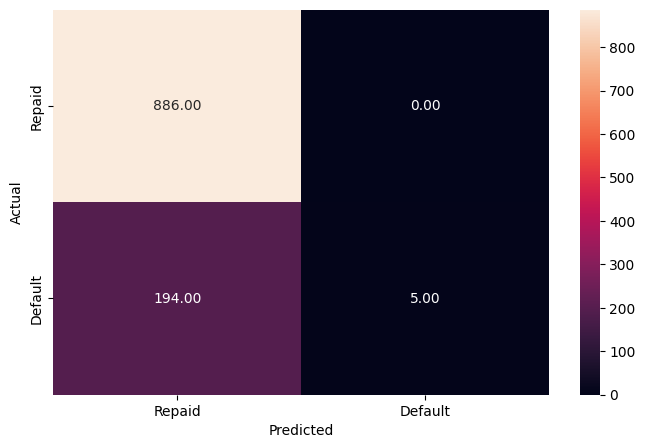

In [ ]:
# Convert categorical variables to numerical using one-hot encoding
df_encoded = pd.get_dummies(df_for_regresion.copy(), columns=['REASON', 'JOB'])

# Select the relevant features and target variable
X = df_encoded[['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC',
                'REASON_DebtCon', 'REASON_HomeImp', 'JOB_Mgr', 'JOB_Office', 'JOB_Other', 'JOB_ProfExe', 'JOB_Sales', 'JOB_Self']]
y = df_encoded['BAD']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Predict on the test data
y_pred = logreg.predict(X_test)
metrics_score(y_test, y_pred)

Observations:

* This model performs well in predicting repaid loans (class 0) but struggles to identify defaulted loans (class 1). 

**Tunning the model:**

Applying Perform grid search with cross-validation to find the best parameters that be able to maximize the false negatives:

Best Parameters: {'model__C': 10, 'model__penalty': 'l1', 'model__solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.84      0.98      0.90       886
           1       0.58      0.14      0.23       199

    accuracy                           0.82      1085
   macro avg       0.71      0.56      0.56      1085
weighted avg       0.79      0.82      0.78      1085

              precision    recall  f1-score   support

           0       0.84      0.98      0.90       886
           1       0.58      0.14      0.23       199

    accuracy                           0.82      1085
   macro avg       0.71      0.56      0.56      1085
weighted avg       0.79      0.82      0.78      1085



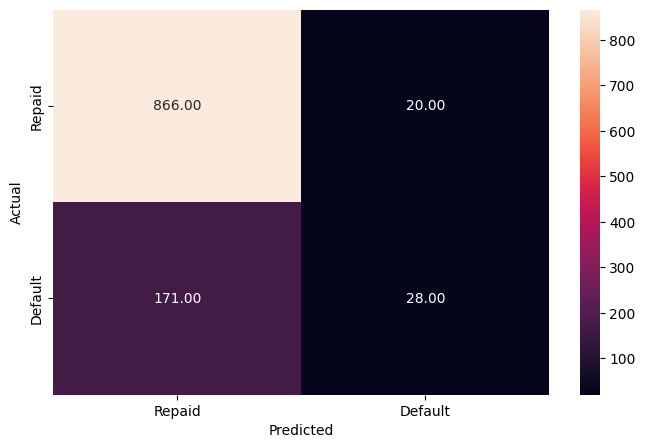

In [ ]:
# Separate the features and target variable
X = df_for_regresion.drop('BAD', axis=1)
y = df_for_regresion['BAD']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']),
        ('cat', OneHotEncoder(), ['REASON', 'JOB'])
    ])

# Initialize logistic regression model
model = LogisticRegression()

# Create the pipeline with preprocessing and model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Define the parameter grid for grid search
param_grid = {
    'model__penalty': ['l1', 'l2'],
    'model__C': [0.001, 0.01, 0.1, 1, 10],
    'model__solver': ['liblinear', 'saga']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, scoring='recall', cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters found by grid search
print("Best Parameters:", grid_search.best_params_)

# Make predictions on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the best model
print(classification_report(y_test, y_pred))
metrics_score(y_test, y_pred)

Observations:

* The Logistic Regression tuned with {'model__C': 10, 'model__penalty': 'l1', 'model__solver': 'liblinear'} performs better. 

* The model shows a relatively high performance in predicting non-defaulted loans (class 0) with high precision and recall. However, it performs less effectively in identifying defaulted loans (class 1) with lower precision and recall.

**Importance Coefficients**

In [ ]:
# Get the feature importance coefficients
feature_importance = logreg.coef_[0]

# Create a dictionary with feature names and corresponding importance coefficients
feature_importance_dict = dict(zip(X_train.columns, feature_importance))

# Sort the dictionary by importance coefficients (descending order)
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: abs(x[1]), reverse=True)

# Print the feature importance coefficients
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

NINQ: 0.02556473094858803
DEROG: -0.007537211226143594
YOJ: 0.003936236664504841
REASON: -0.003289955595968813
DELINQ: 0.003188425309393487
JOB: 0.001878451145427594
CLAGE: 0.0008552398725377179
DEBTINC: 0.0003797016807434511
CLNO: -0.00012092914239588315
LOAN: -3.868899323419279e-05
MORTDUE: -8.81540675043295e-06
VALUE: -1.7166301376825572e-07


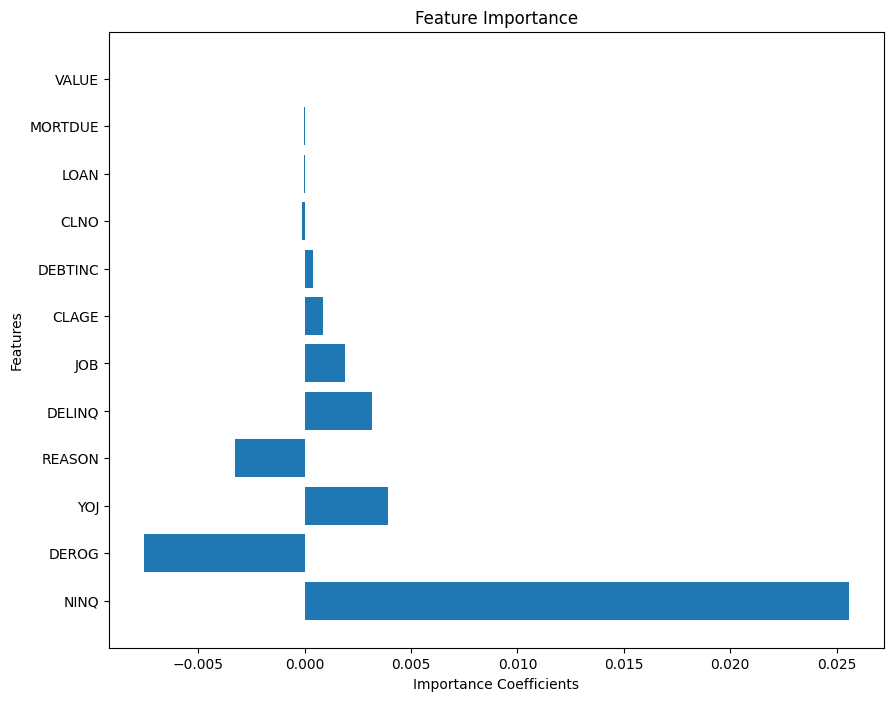

In [ ]:
# Get the feature importance coefficients
feature_importance = logreg.coef_[0]

# Create a dictionary with feature names and corresponding importance coefficients
feature_importance_dict = dict(zip(X_train.columns, feature_importance))

# Sort the dictionary by importance coefficients (descending order)
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: abs(x[1]), reverse=True)

# Extract the feature names and importance coefficients
features = [feature for feature, _ in sorted_feature_importance]
importances = [importance for _, importance in sorted_feature_importance]

# Plot the feature importance
plt.figure(figsize=(10, 8))
plt.barh(features, importances)
plt.xlabel('Importance Coefficients')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()


Observations:

* The analysis indicates that the number of recent credit inquiries (NINQ) has the highest positive impact, followed by years on the job (YOJ), while the number of major derogatory reports (DEROG) has a negative impact on the target variable. Other factors such as the reason for the loan (REASON), number of delinquent credit lines (DELINQ), type of job (JOB), debt-to-income ratio (DEBTINC), age of the oldest trade line (CLAGE), number of credit lines (CLNO), loan amount (LOAN), and amounts due on existing mortgage (MORTDUE) and property value (VALUE) also contribute to the prediction, but to a lesser extent.

* These findings suggest that recent credit inquiries, longer job tenure, and lower number of major derogatory reports are favorable factors associated with a higher likelihood of the target class. On the other hand, higher numbers of delinquent credit lines, certain loan reasons, higher debt-to-income ratios, and certain job types may have a negative impact on the target variable.

### Decision Tree

**Data preparation**

Note: remeber that for Trees and Random Forest it will be used the original "df" with just extreme ouiliers removed because these models are less sensible to outliers.

In [ ]:
# Creating dummy variables for the categorical variables
to_get_dummies_for = categorical_columns

# Creating dummy variables
df = pd.get_dummies(data = df, columns = to_get_dummies_for, drop_first = True)

In [ ]:
#Separating the independent variables (X) and the dependent variable (Y)

Y = df.BAD

X = df.drop(['BAD'], axis = 1)

In [ ]:
# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

**Building a Decision Tree Model**

We will build our model using the DecisionTreeClassifier function.

If the frequency of class 1 is 19% and the frequency of class 0 is 81%, then class 0 will become the dominant class and the decision tree will become biased toward the dominant class.

Class_weight is a hyperparameter for the decision tree classifier, and in this case, we can pass a dictionary {0:0.19, 1:0.80} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

In [ ]:
# Building decision tree model
dt = DecisionTreeClassifier(class_weight = {0: 0.19, 1: 0.81}, random_state = 1)

In [ ]:
# Fitting decision tree model
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.19, 1: 0.81}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3299
           1       1.00      1.00      1.00       771

    accuracy                           1.00      4070
   macro avg       1.00      1.00      1.00      4070
weighted avg       1.00      1.00      1.00      4070



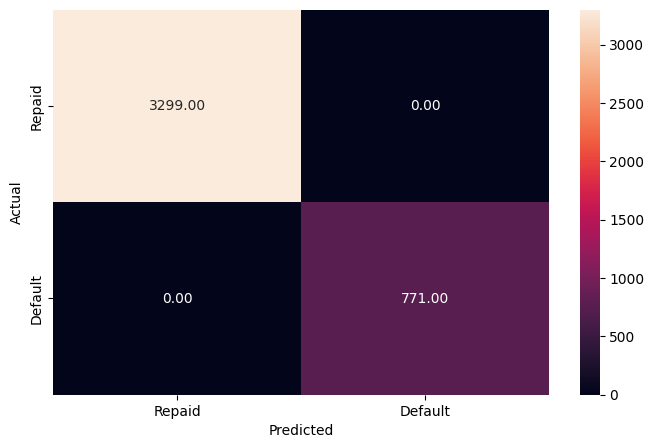

In [ ]:
# Checking performance on the training dataset
y_train_pred_dt = dt.predict(x_train)

metrics_score(y_train, y_train_pred_dt)

**Observation:**

The Decision tree is giving a 100% score for all metrics on the training dataset.

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      1415
           1       0.65      0.61      0.63       330

    accuracy                           0.86      1745
   macro avg       0.78      0.77      0.77      1745
weighted avg       0.86      0.86      0.86      1745



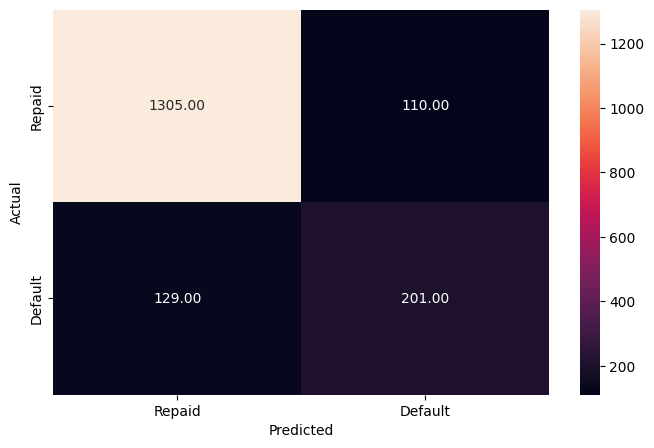

In [ ]:
# Checking performance on the test dataset
y_test_pred_dt = dt.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

In [ ]:
dtree_test = model_performance_classification(dt,x_test,y_test)
dtree_test

,Precision,Recall,Accuracy
0,0.8,0.8,0.9


Observations:

* The Decision Tree works well on the training data but not so well on the test data as the recall is 0.8 in comparison to 1 for the training dataset, i.e., the Decision Tree is overfitting the training data.

* The precision on the test data suggests that there's a 20% chance that the model will predict that someone is going to default even though it will not, loosing a potential customer.

* Based on these results, the model shows a relatively high performance in predicting non-defaulted loans (class 0) with high precision and recall. However, it performs less effectively in identifying defaulted loans (class 1) with lower precision and recall. Improving the model's performance on defaulted loans could be a potential area for further optimization and fine-tuning.

<Axes: xlabel='Importance'>

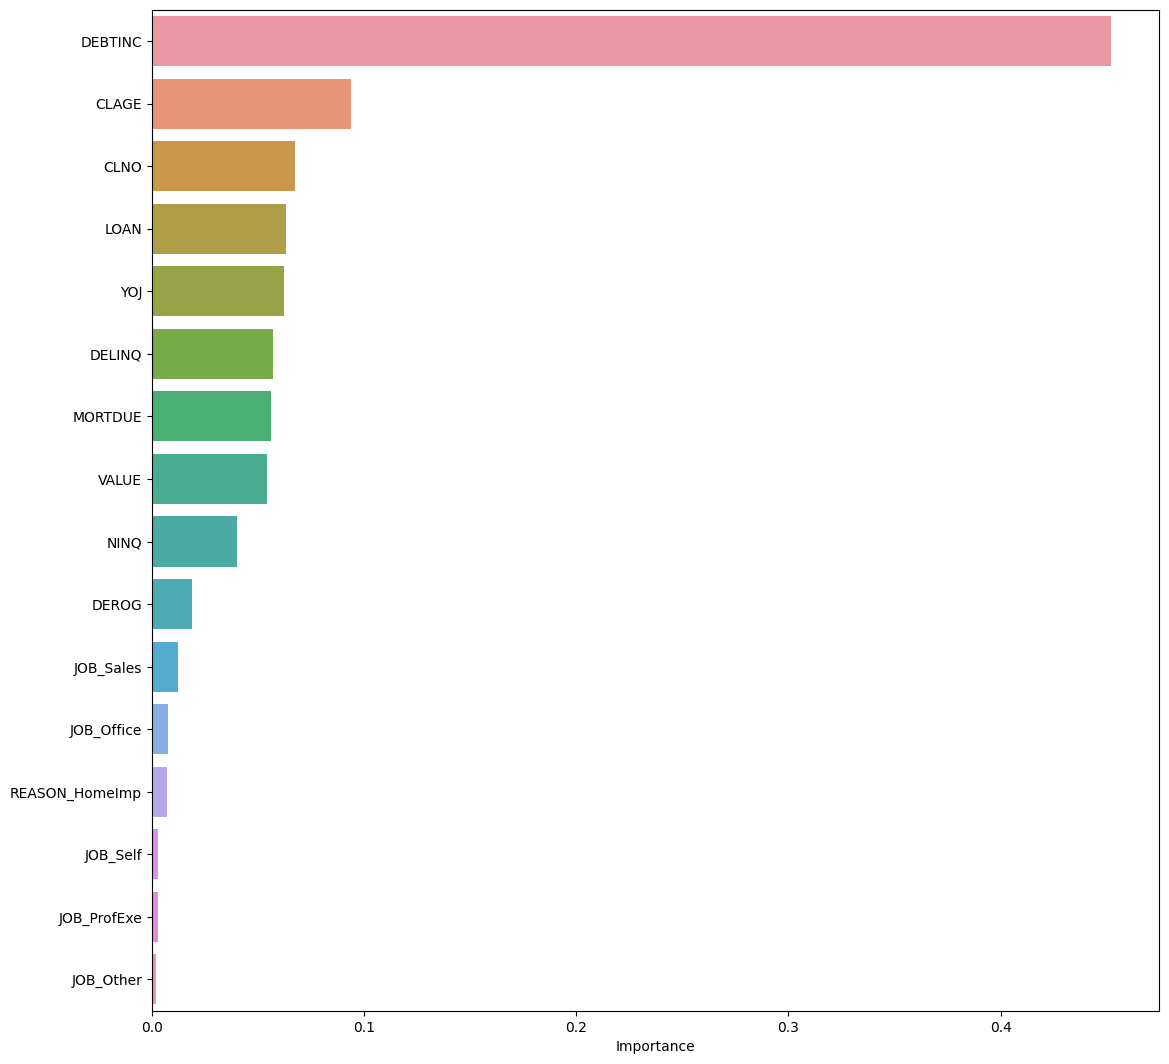

In [ ]:
# Plot the feature importance

importances = dt.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x = importance_df.Importance,y = importance_df.index)

**Observations:**

The debt-to-income ratio (DEBTINC) is the most important variable in predicting the target. Other variables such as loan characteristics and credit-related factors also contribute to the prediction, while certain job types, loan reasons, and specific credit factors may have little or no impact on the target variable.

### **Decision Tree - Hyperparameter Tuning**


In [ ]:
# Choose the type of classifier
dtree_estimator = DecisionTreeClassifier(class_weight = {0: 0.19, 1: 0.81}, random_state = 1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 7), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV = GridSearchCV(dtree_estimator, parameters, scoring = scorer, cv = 10)

# Fitting the grid search on the train data
gridCV = gridCV.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
dtree_estimator = gridCV.best_estimator_

# Fit the best estimator to the data
dtree_estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.19, 1: 0.81}, max_depth=6,
                       min_samples_leaf=25, random_state=1)

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      3299
           1       0.59      0.83      0.69       771

    accuracy                           0.86      4070
   macro avg       0.77      0.85      0.80      4070
weighted avg       0.89      0.86      0.87      4070



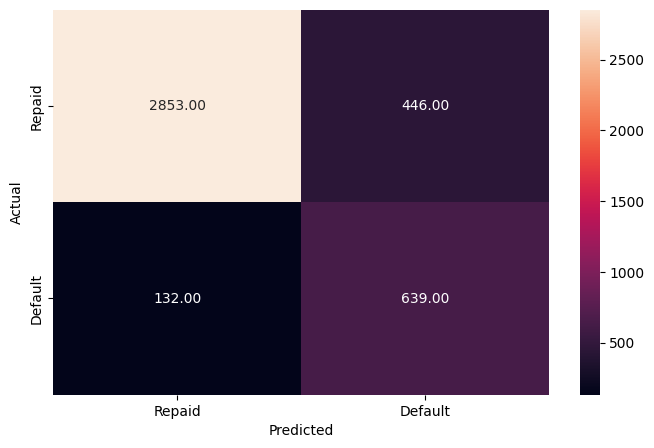

In [ ]:
# Checking performance on the training dataset
y_train_pred_dt = dtree_estimator.predict(x_train)

metrics_score(y_train, y_train_pred_dt)

In [ ]:
dtree_tuned_test = model_performance_classification(dtree_estimator,x_test,y_test)
dtree_tuned_test

,Precision,Recall,Accuracy
0,0.8,0.8,0.8


Observation:

* In comparison to the model with default values of hyperparameters, the performance on the training set has gone down significantly. This makes sense because we are trying to reduce overfitting.

              precision    recall  f1-score   support

           0       0.95      0.85      0.90      1415
           1       0.56      0.81      0.66       330

    accuracy                           0.84      1745
   macro avg       0.76      0.83      0.78      1745
weighted avg       0.88      0.84      0.85      1745



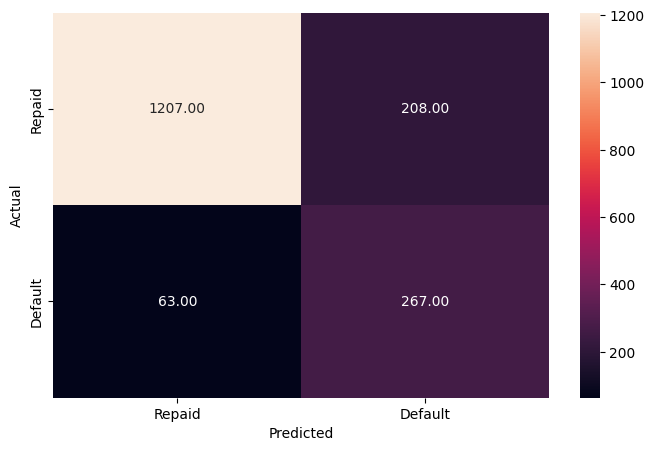

In [ ]:
# Checking performance on the test dataset
y_test_pred_dt = dtree_estimator.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

In [ ]:
dtree_tuned_test = model_performance_classification(dtree_estimator,x_test,y_test)
dtree_tuned_test

,Precision,Recall,Accuracy
0,0.8,0.8,0.8


Observations: 

* The tuned model is not performing well in comparison to the model with default values of hyperparameters.

* This model is not overfitting the training data and giving approximately the same result on the test and train datasets.

* Again, the model demonstrates good performance in predicting class 0 samples with high precision and reasonable recall. However, it struggles to accurately predict class 1 samples, with lower precision and a need for improvement in recall.

**Feautre Importance:**

<Axes: xlabel='Importance'>

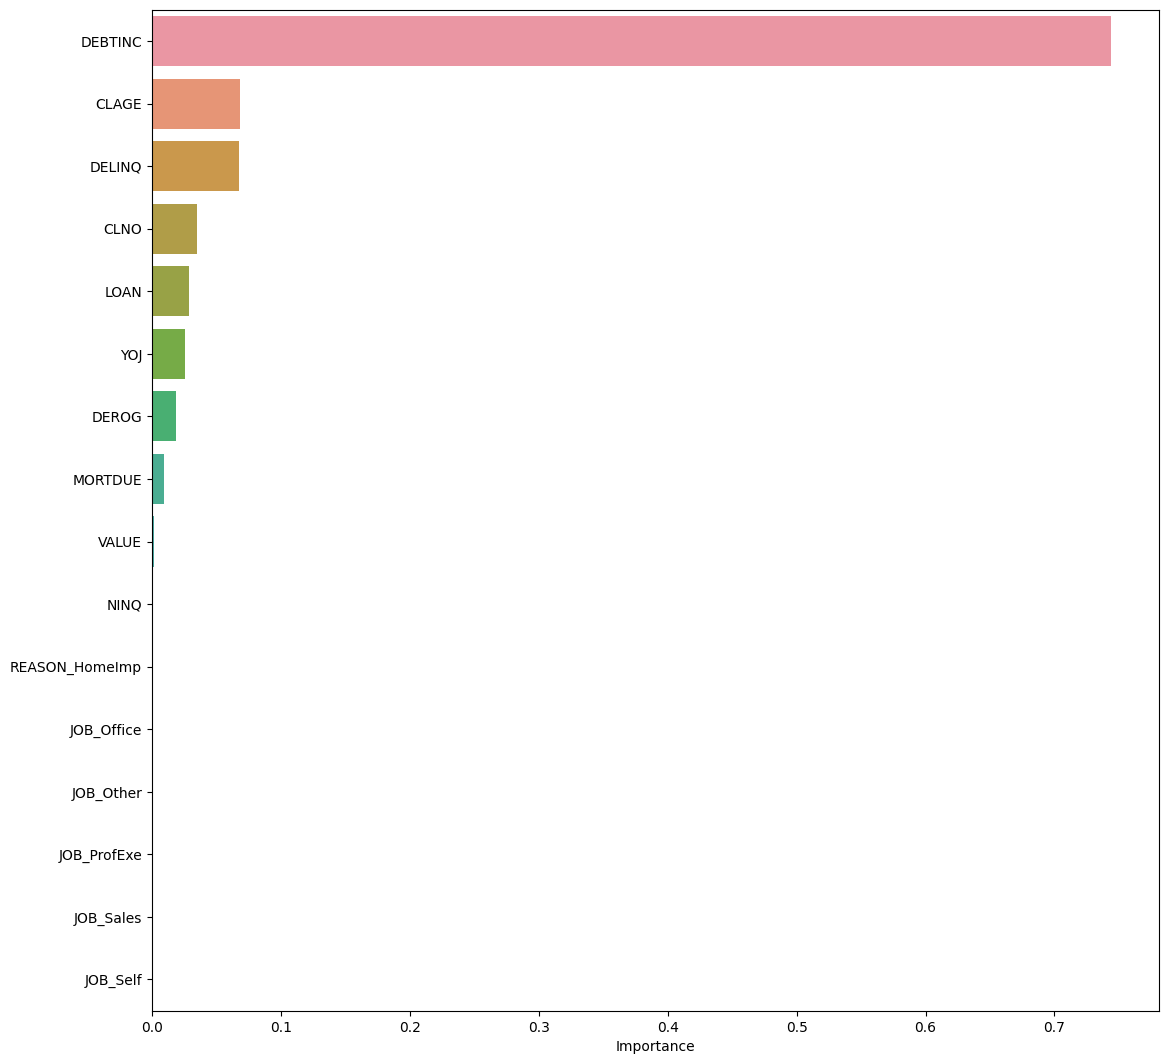

In [ ]:
importances = dtree_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x= importance_df.Importance, y= importance_df.index)

**Observations:**

It appears that DEBTINC is the most important feature for determining the target variable, followed by CLAGE and DELINQ. The other features do not significantly contribute to the model's predictive power.

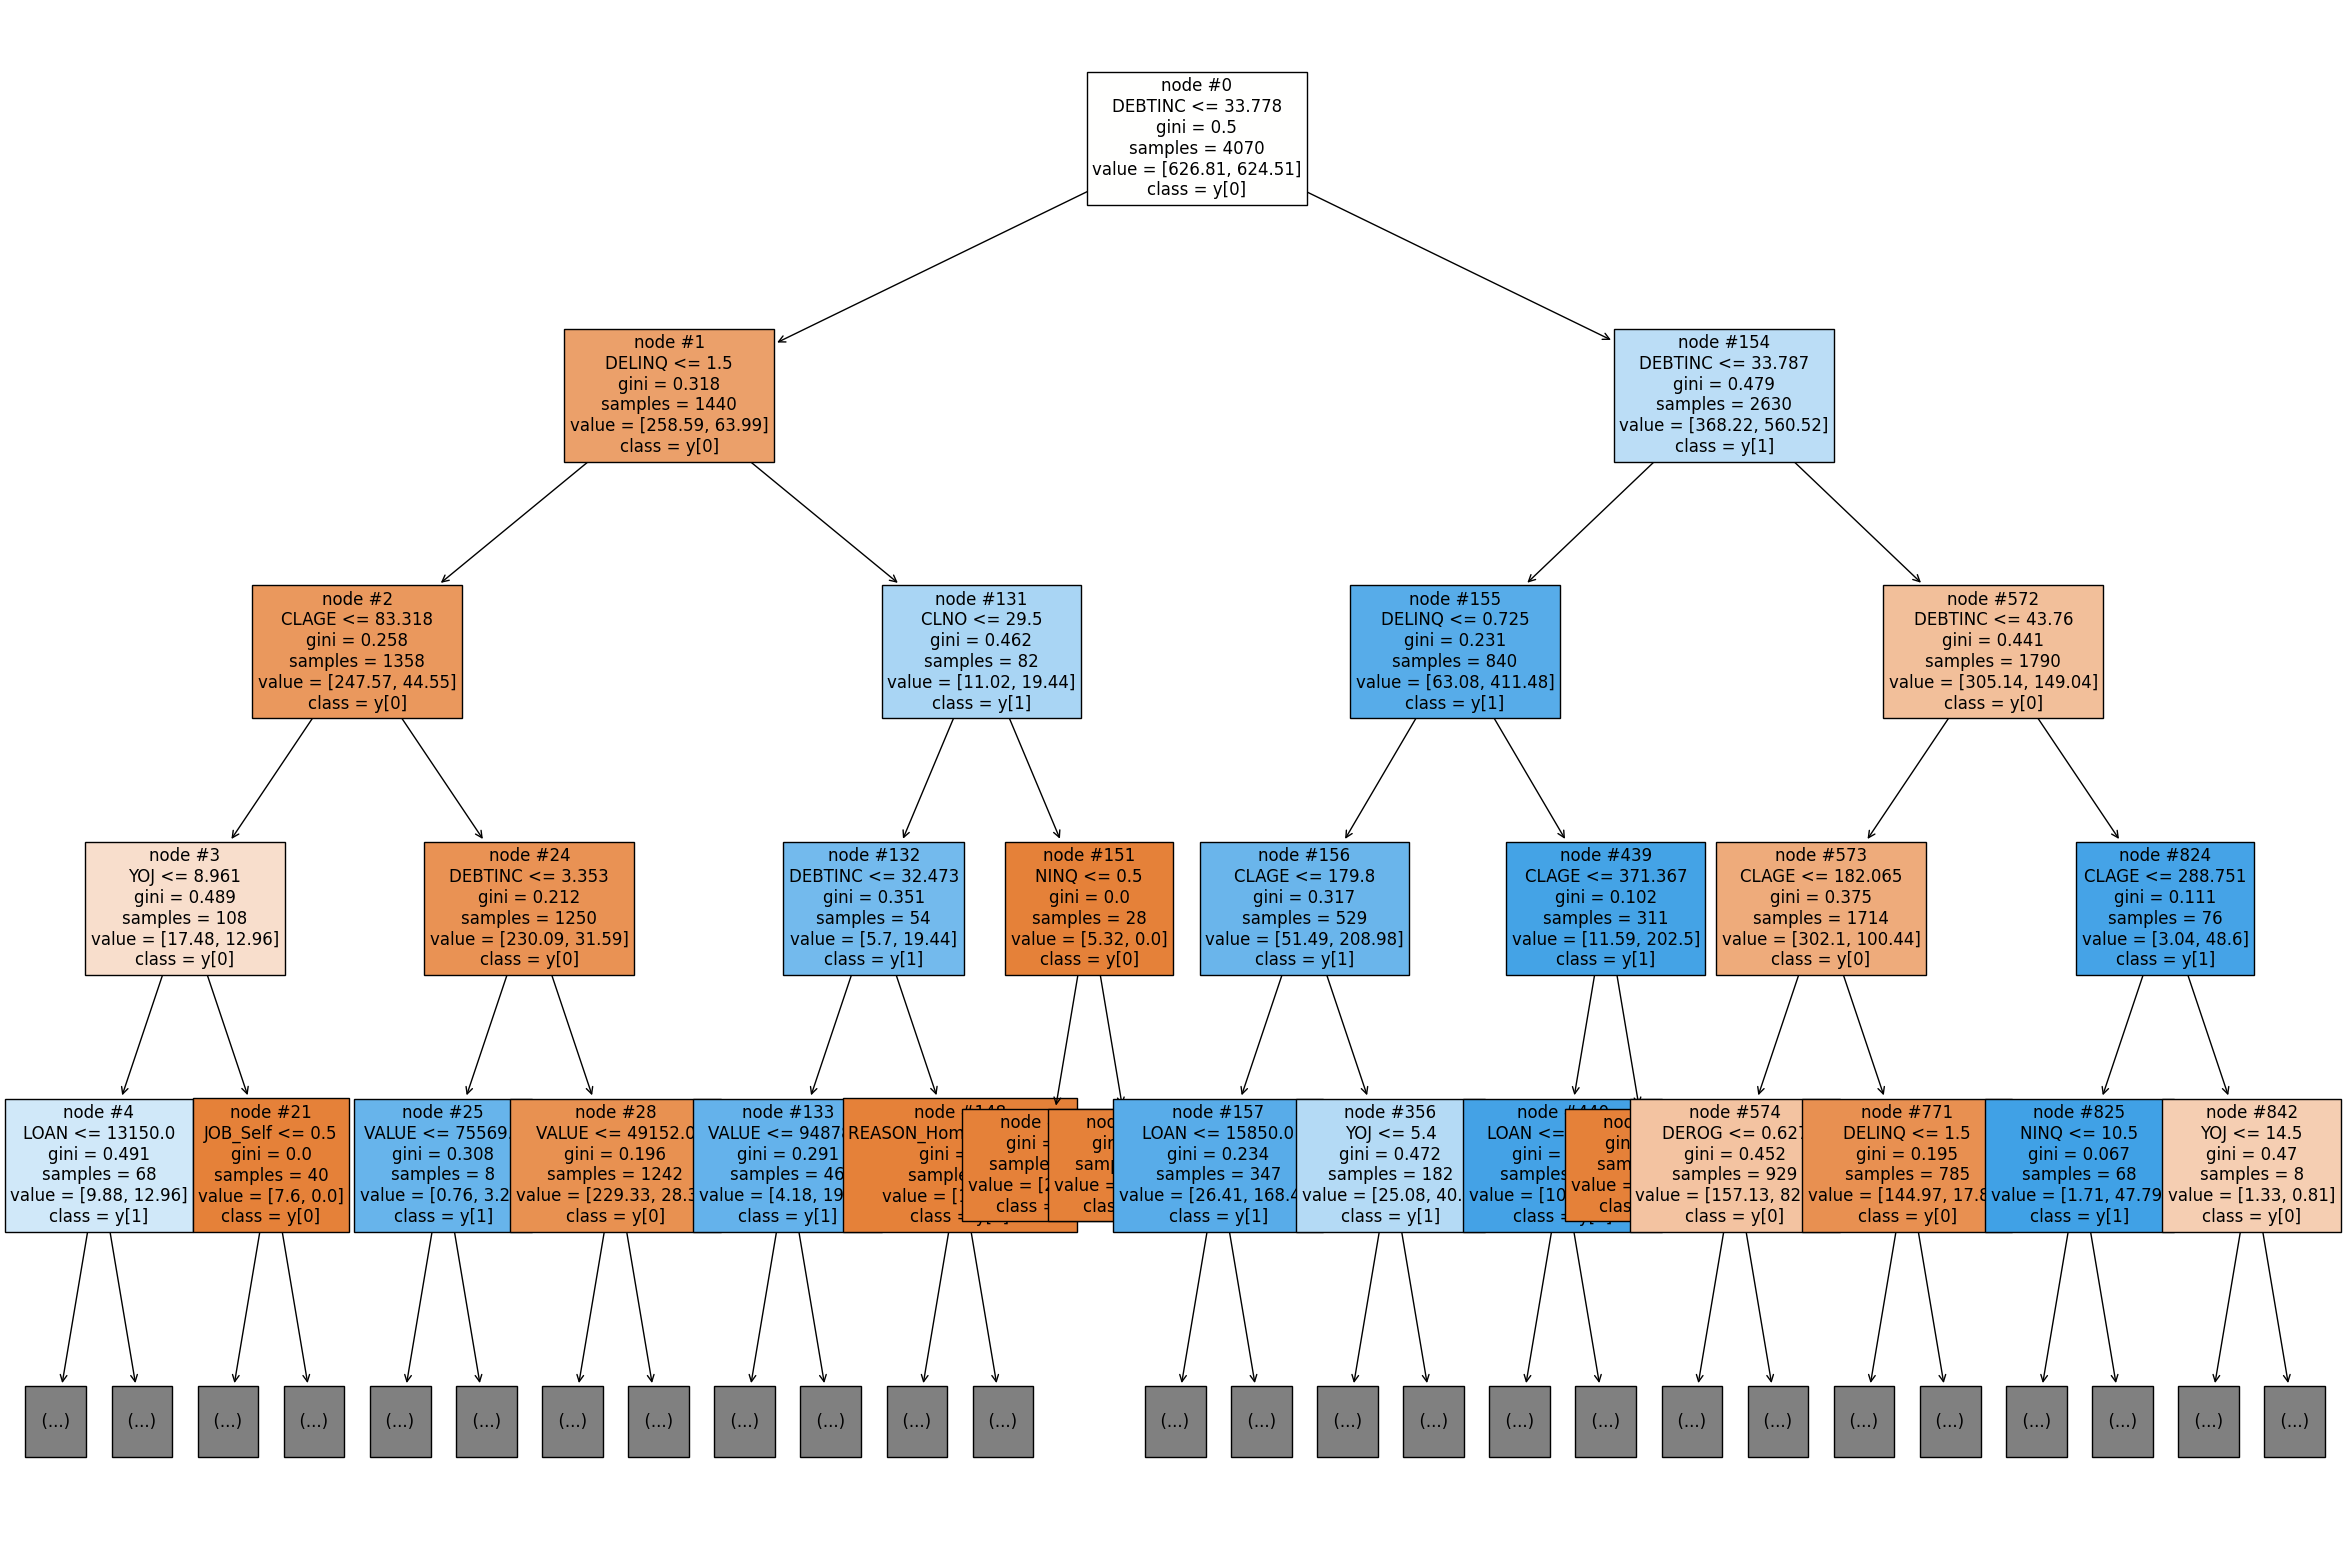

In [ ]:
features = list(X.columns)

plt.figure(figsize = (30, 20))

tree.plot_tree(dt, max_depth = 4, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction. 

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [ ]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(class_weight = {0: 0.19, 1: 0.81}, random_state = 1)

rf_estimator.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3299
           1       1.00      1.00      1.00       771

    accuracy                           1.00      4070
   macro avg       1.00      1.00      1.00      4070
weighted avg       1.00      1.00      1.00      4070



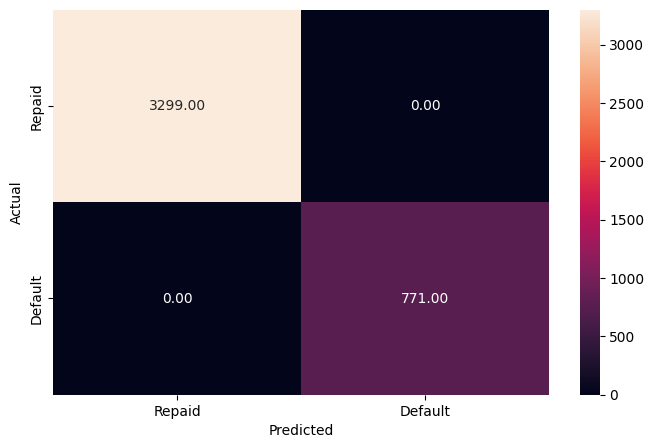

In [ ]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(x_train)

metrics_score(y_train, y_pred_train_rf)

**Observation:**

The Random Forest is giving a 100% score for all metrics on the training dataset.

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1415
           1       0.87      0.66      0.75       330

    accuracy                           0.92      1745
   macro avg       0.90      0.82      0.85      1745
weighted avg       0.91      0.92      0.91      1745



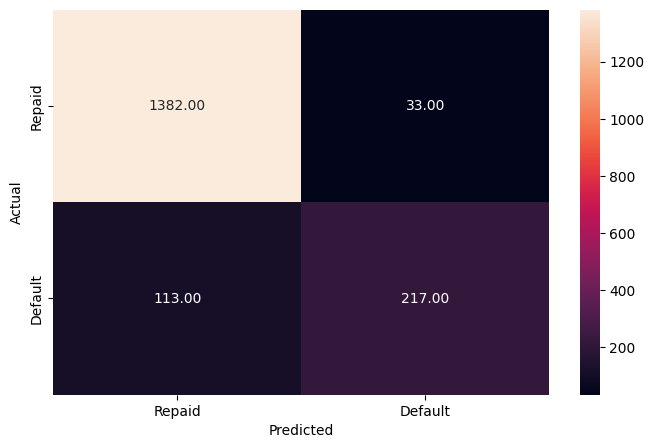

In [ ]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(x_test)

metrics_score(y_test, y_pred_test_rf)

In [ ]:
rf_estimator_test = model_performance_classification(rf_estimator,x_test,y_test)
rf_estimator_test

,Precision,Recall,Accuracy
0,0.9,0.8,0.9


Observations:

* The Random Forest classifier seems to be overfitting the training data. The recall on the training data is 1, while the recall on the test data is only ~ 0.80 for class 1.

* The model achieves a high accuracy of 0.92, indicating that it correctly predicts the class labels for a large portion of the samples. The macro average of precision, recall, and F1-score is 0.90, 0.82, and 0.85 respectively, suggesting a reasonably balanced performance across both classes. The weighted average, taking into account the class distribution, also shows a high precision of 0.91 and a high recall of 0.92, indicating good overall performance of the model.

**Importance Features:**

<Axes: xlabel='Importance'>

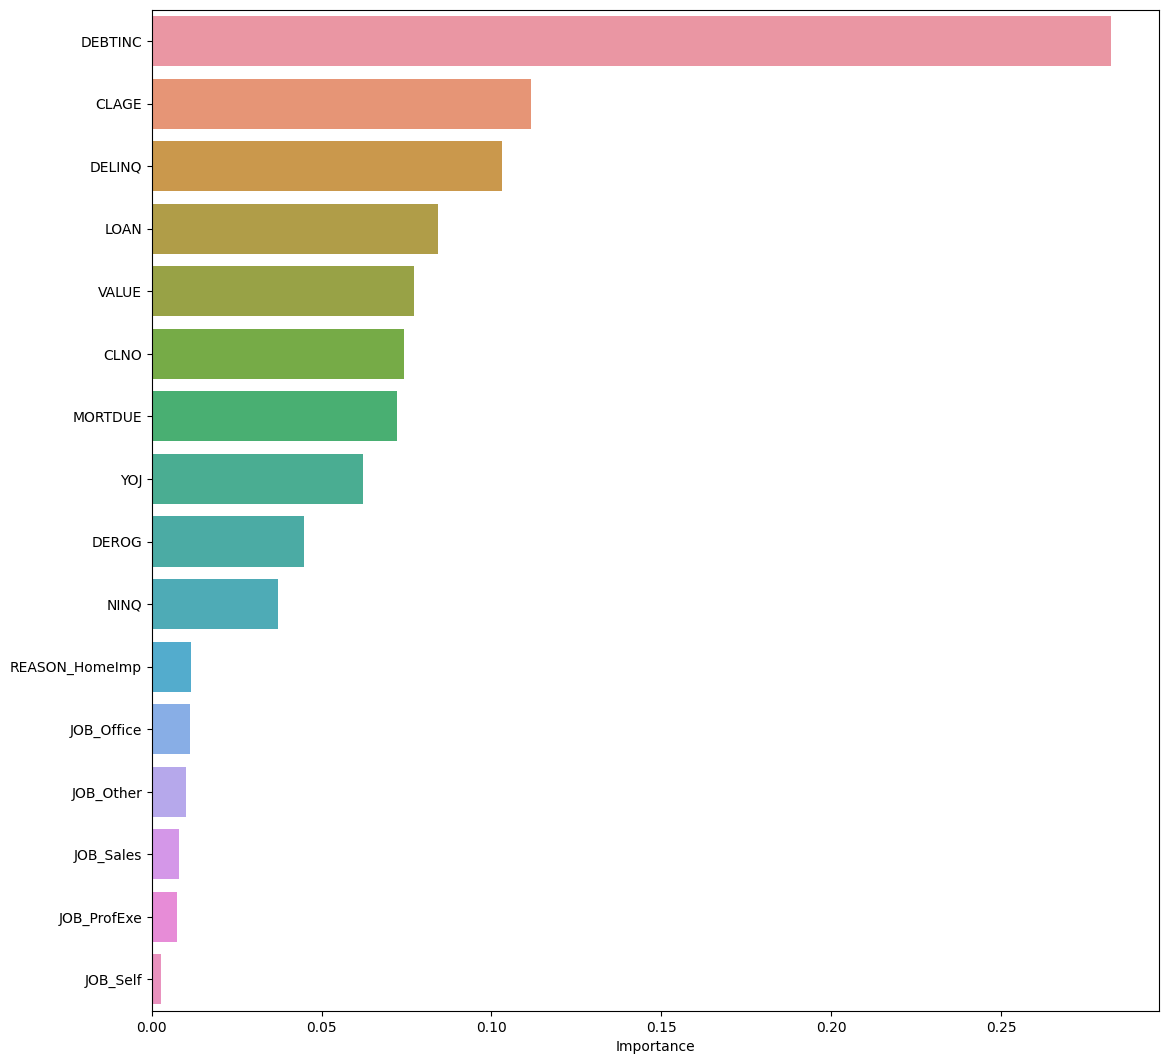

In [ ]:
importances = rf_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x=importance_df.Importance, y=importance_df.index)

**Observations:**

In this case, the DEBTINC feature plays the most significant role in determining loan delinquency, followed by several other factors such as credit line age, delinquent credit lines, loan amount, property value, total number of credit lines, mortgage amount, and years on the job. The remaining features seem to have little impact on the model's predictions.

### **Random Forest Classifier Hyperparameter Tuning**

In [ ]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight = {0: 0.19, 1: 0.81}, random_state = 1)

# Grid of parameters to choose from
params_rf = {  
        "n_estimators": [100, 250, 500],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.7, 0.9, 'auto'],
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [ ]:
rf_estimator_tuned.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, max_features='auto',
                       min_samples_leaf=3, n_estimators=500, random_state=1)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3299
           1       0.92      0.99      0.96       771

    accuracy                           0.98      4070
   macro avg       0.96      0.99      0.97      4070
weighted avg       0.98      0.98      0.98      4070



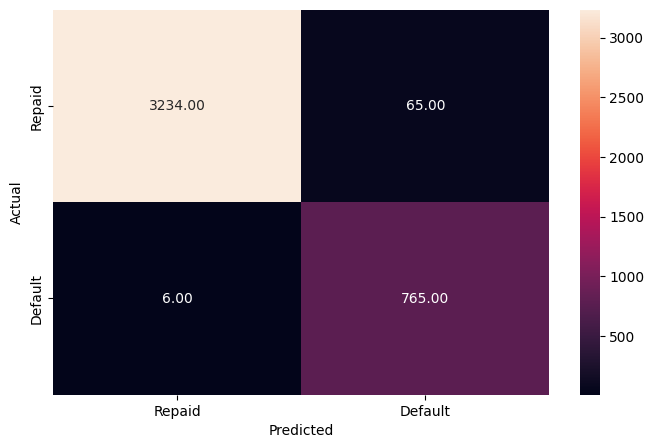

In [ ]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(x_train)

metrics_score(y_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1415
           1       0.81      0.76      0.78       330

    accuracy                           0.92      1745
   macro avg       0.88      0.86      0.87      1745
weighted avg       0.92      0.92      0.92      1745



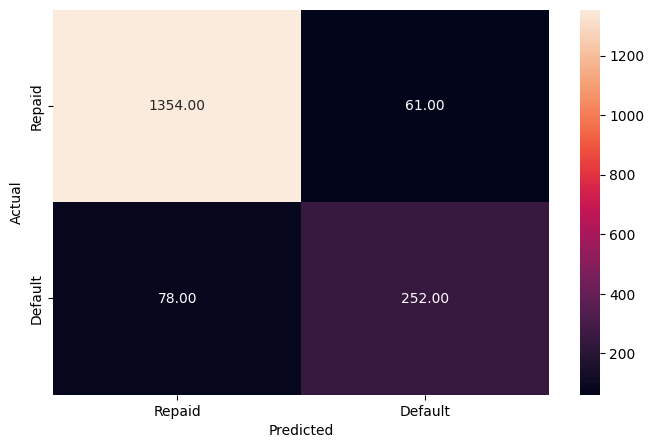

In [ ]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(x_test)

metrics_score(y_test, y_pred_test_rf_tuned)

In [ ]:
rf_estimator_tuned_test = model_performance_classification(rf_estimator_tuned, x_test, y_test)
rf_estimator_tuned_test

,Precision,Recall,Accuracy
0,0.9,0.9,0.9


**Features Importance:**

                Importance
DEBTINC                0.3
CLAGE                  0.1
DELINQ                 0.1
LOAN                   0.1
VALUE                  0.1
CLNO                   0.1
MORTDUE                0.1
YOJ                    0.1
DEROG                  0.0
NINQ                   0.0
JOB_Office             0.0
REASON_HomeImp         0.0
JOB_Other              0.0
JOB_ProfExe            0.0
JOB_Sales              0.0
JOB_Self               0.0


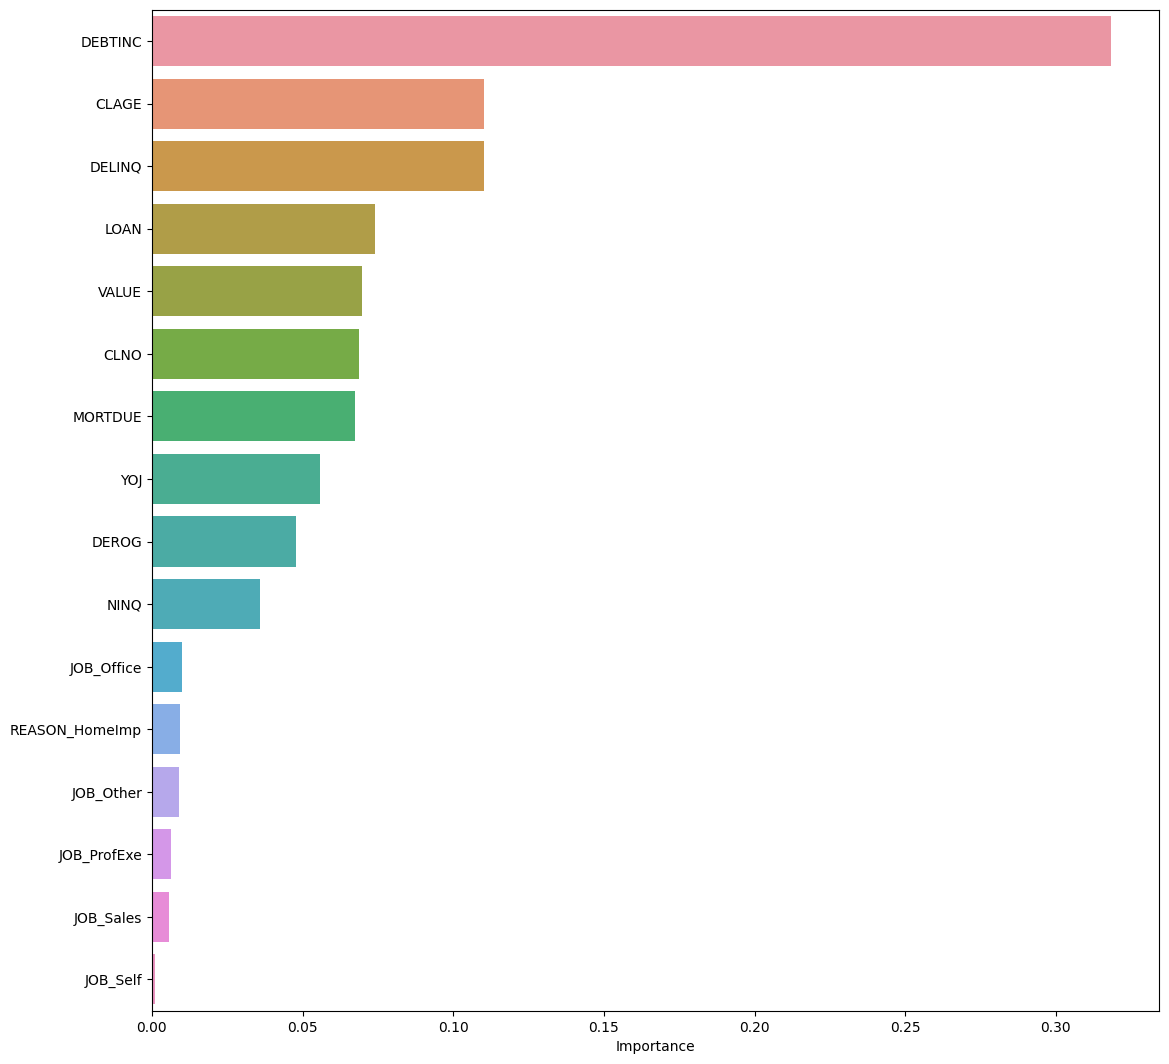

In [ ]:
# Plotting feature importance
importances = rf_estimator_tuned.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x=importance_df.Importance, y=importance_df.index)

print(importance_df)

**Observations:**

 As the other models also has shown, the debt-to-income ratio (DEBTINC) is the most important feature in determining loan default, followed by several other factors such as credit line age, delinquent credit lines, loan amount, property value, total number of credit lines, mortgage amount, and years on the job. The remaining features do not appear to have a substantial impact on the model's predictions.

# Final Conclusions

**Leading Questions:**

* How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

* What are the most meaningful insights relevant to the problem?

* What model do you propose to be adopted? Why is this the best solution to adopt?

**To ensure that we identify as many bad loans as possible, our priority is to minimize false negatives.** This means we want to correctly identify as many bad loans as possible, even if it results in a higher number of false positives.

**The decision tree model performs relatively better in this regard**, with a recall of 0.81 for the positive class (BAD=1). This indicates that it correctly identifies 81% of the bad loans in the dataset. Although the precision for the positive class is lower (0.56), our primary concern is to minimize false negatives.

**The logistic regression model has a higher precision** for the positive class (0.65), but its recall is only 0.17, indicating that it misses a significant number of bad loans.

**The random forest classifier also has a relatively good recall of 0.76** for the positive class, indicating that it correctly identifies 76% of the bad loans.

**To prioritize correctly identifying bad loans and minimize potential losses, I finally recommend the decision tree or random forest classifier**. The random forest classifier provides the advantage of ensemble learning, which combines multiple decision trees for better generalization and robustness while maintaining a reasonable level of precision. Therefore, **the proposed model to be adopted would be the random forest classifier.**

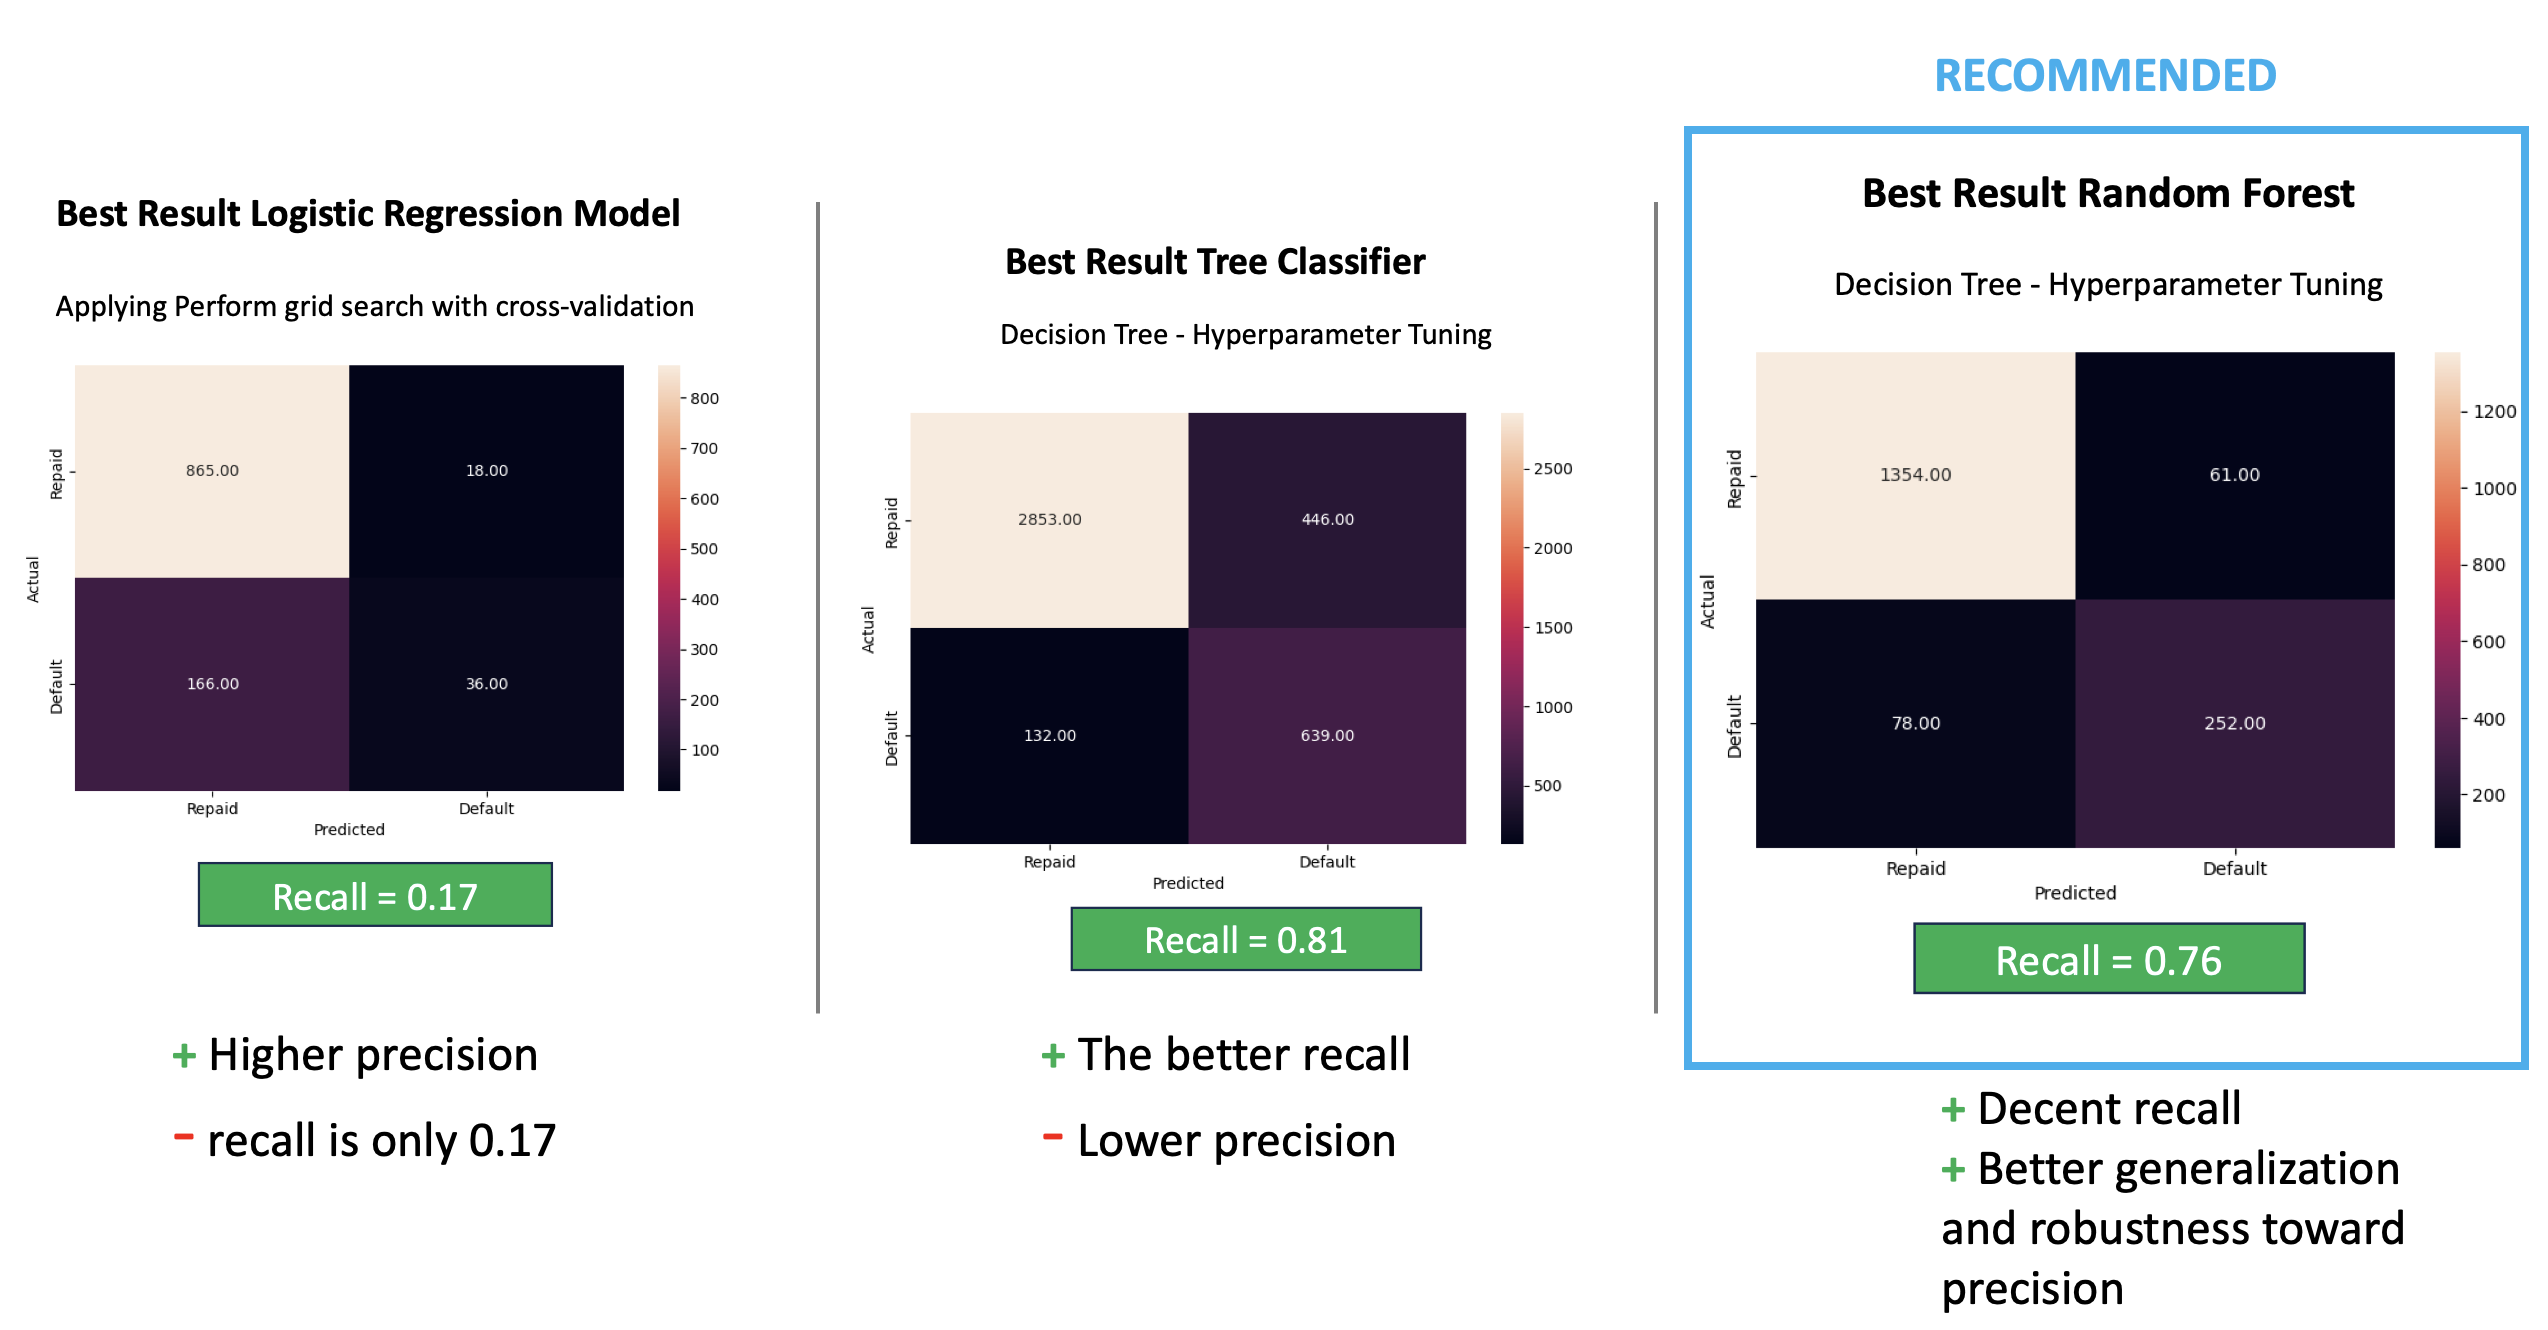

**Business General Conclusions(In addition to EDA):**

* The debt-to-income ratio (DEBTINC) is the most influential variable in predicting the target variable, followed by other factors related to credit history, loan characteristics, and property value. Understanding and monitoring these key features can provide valuable insights for assessing loan risk and making informed decisions.

* Focus on managing the debt-to-income ratio (DEBTINC): Given its high importance in predicting the target variable, it is crucial for the business to closely monitor and manage borrowers' debt-to-income ratios. This can involve implementing stricter criteria for approving loans to applicants with high debt-to-income ratios or offering financial counseling to help borrowers improve their ratios.

* Pay attention to credit history: Variables such as delinquencies (DELINQ) and derogatory marks (DEROG) play a significant role in predicting the outcome. It is important for the business to carefully evaluate applicants' credit histories and consider the potential risk associated with previous delinquencies or derogatory marks.

* Consider property value and loan characteristics: Variables such as property value (VALUE), loan amount (LOAN), and mortgage debt (MORTDUE) are important factors in predicting the target variable. The business should assess the risk associated with higher loan amounts or properties with lower appraised values and adjust lending criteria accordingly.

* Evaluate borrowers' employment stability: The number of years in the current job (YOJ) is a relevant feature in predicting loan outcomes. Lenders should consider the stability of borrowers' employment and assess the potential risk associated with borrowers who have shorter job tenures.

* Monitor the age of credit lines: The age of the oldest trade line in months (CLAGE) is a meaningful variable. Lenders should consider the length of borrowers' credit history and evaluate the potential risk associated with applicants who have shorter credit histories.

**Technical General Conclusions:**

* Explore the possibility of creating new meaningful features from the existing variables. For example, you can create interaction terms, polynomial features, or transform variables using logarithmic or exponential functions. Feature engineering can provide additional information and capture complex relationships between variables, potentially improving the model's performance.

* Explore new ways of maintaining the integrity of the data. There are a lot of values that are missing. Running retrospective sessions with the technical team could help identify improvements for subsequent iterations.